In [2]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t, x
@variables u(..)
Dt = Differential(t)
Dx = Differential(x)
Dxx = Differential(x)^2

eq = Dt(u(t, x)) + u(t, x) * Dx(u(t, x)) - (0.01 / pi) * Dxx(u(t, x)) ~ 0

bcs = [u(0, x) ~ -sinpi(x),
    u(t, -1) ~ 0.0,
    u(t, 1) ~ 0.0,
    u(t, -1) ~ u(t, 1)]

domains = [t ∈ Interval(0.0, 1.0),
    x ∈ Interval(-1.0, 1.0)]

@named pde_system = PDESystem(eq, bcs, domains, [t,x], [u(t,x)])

PDESystem
Equations: Equation[Differential(x)(u(t, x))*u(t, x) + Differential(t)(u(t, x)) - 0.003183098861837907Differential(x)(Differential(x)(u(t, x))) ~ 0]
Boundary Conditions: Equation[u(0, x) ~ -sin(πx), u(t, -1) ~ 0.0, u(t, 1) ~ 0.0, u(t, -1) ~ u(t, 1)]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0..1.0), Symbolics.VarDomainPairing(x, -1.0..1.0)]
Dependent Variables: Num[u(t, x)]
Independent Variables: Num[t, x]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [3]:
chain = FullyConnected(2, 1, tanh; hidden_dims=16, num_layers=5)
pinn = PINN(chain)
sampler = QuasiRandomSampler(2000, 200)
strategy = NonAdaptiveTraining(1, 10)
prob = Sophon.discretize(pde_system, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [1.4085174798965454 -1.2121944427490234; 0.561835527420044 0.010327864438295364; … ; 1.5105738639831543 0.32148462533950806; -0.18251360952854156 -1.4970661401748657], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [-0.6359860301017761 -0.16188956797122955 … 0.7107234597206116 0.25357943773269653; -0.6248577237129211 -0.23924891650676727 … -0.5615225434303284 -0.6095168590545654; … ; -0.5393600463867188 -0.21284866333007812 … -0.3618816137313843 0.661764919757843; -0.4682725965976715 0.4008866548538208 … -0.38184109330177307 0.6430938839912415], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.2984274923801422 -0.24326109886169434 … -0.7198391556739807 -0.5293235182762146; -0.17448660731315613 -0.16890020668506622 … 0.30691471695899963 -0.6967571377754211; … ; -0.002482192125171423 -0.649617612361908 … 0.2237975001335144 0.17741917073726654; 0.4629054069519043 -0.36202192306518555 …

In [4]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 163.82734408943207


Loss: 13.80560961790478


Loss: 6.050243297090767


Loss: 3.7182912263522883


Loss: 3.4107378138862803


Loss: 2.9067889676474863


Loss: 2.260611305942964


Loss: 2.0300274472830315


Loss: 1.683001642041339


Loss: 1.4567418662939136


Loss: 1.2505451874433766


Loss: 1.1025956343006411


Loss: 0.9616940536399788


Loss: 0.8900018168647896


Loss: 0.8319026691618407


Loss: 0.6278702502351596


Loss: 0.5889240139384707


Loss: 0.54298108631067


Loss: 0.49534219016043923


Loss: 0.45190478575641163


Loss: 0.40060342784348674


Loss: 0.3849137597444843


Loss: 0.3659956788421595


Loss: 0.34936411799614014


Loss: 0.33181618193318557


Loss: 0.31759332284216435


Loss: 0.3094785845921181


Loss: 0.29889038305737037


Loss: 0.2818015361834182


Loss: 0.27839245371472143


Loss: 0.2713217590846157


Loss: 0.2674265378652594


Loss: 0.26452192893432747


Loss: 0.2599067191549149


Loss: 0.2572533477315512


Loss: 0.25478207900363625


Loss: 0.2506389199576934


Loss: 0.24646776244631022


Loss: 0.24215614989900716


Loss: 0.23879881808741285


Loss: 0.23530689158951407


Loss: 0.23402272471126093


Loss: 0.23333551420270265


Loss: 0.2308628334968291


Loss: 0.22871437882749499


Loss: 0.22321625108199206


Loss: 0.22211538392654187


Loss: 0.22113611445603926


Loss: 0.21851333220795036


Loss: 0.21530529179608462


Loss: 0.21438162406281433


Loss: 0.2128404045354458


Loss: 0.2108654367791389


Loss: 0.21038626046375036


Loss: 0.2087329326736967


Loss: 0.20715311335704306


Loss: 0.20528117055475084


Loss: 0.20322996084889255


Loss: 0.19945031382252348


Loss: 0.19877782971470107


Loss: 0.19716787134190042


Loss: 0.19451005384766865


Loss: 0.1932352498064531


Loss: 0.19040631772854788


Loss: 0.18905574132378192


Loss: 0.1867242071444215


Loss: 0.1833882559711818


Loss: 0.1790246335953862


Loss: 0.17564517756611825


Loss: 0.17100023390719427


Loss: 0.16722224852432876


Loss: 0.1619733061091422


Loss: 0.1578003479298561


Loss: 0.15401120554080253


Loss: 0.15058149460269943


Loss: 0.1450638443927457


Loss: 0.1393310789267214


Loss: 0.13531726392969018


Loss: 0.13203789879933445


Loss: 0.1253077075725698


Loss: 0.1184622724236613


Loss: 0.11259129060444997


Loss: 0.1097868859245903


Loss: 0.10505080077179671


Loss: 0.10240096820645317


Loss: 0.09602213131310448


Loss: 0.09150166602185796


Loss: 0.09023540532878072


Loss: 0.08735998300195622


Loss: 0.08163946812730086


Loss: 0.07681762103176556


Loss: 0.07534610870490764


Loss: 0.07222041054447867


Loss: 0.0692309562039907


Loss: 0.06567244327061293


Loss: 0.06320438129090607


Loss: 0.06135314364976357


Loss: 0.05969593890317512


Loss: 0.05812256978481913


Loss: 0.05680502731845354


Loss: 0.05488928362497794


Loss: 0.053259328741349324


Loss: 0.05250417374100739


Loss: 0.05011774841678275


Loss: 0.04829377258380043


Loss: 0.047738300790445554


Loss: 0.04677624088318127


Loss: 0.044718890544059885


Loss: 0.04421916618817443


Loss: 0.04294564049825014


Loss: 0.04117449017863516


Loss: 0.03927305389970137


Loss: 0.03762067044762301


Loss: 0.036444724054989615


Loss: 0.03574365181126834


Loss: 0.03445473151033725


Loss: 0.03380533945561209


Loss: 0.03222281107172739


Loss: 0.030697206841376248


Loss: 0.029830804333470837


Loss: 0.029009229006844862


Loss: 0.027344360141708927


Loss: 0.025974107208772877


Loss: 0.024184154024529975


Loss: 0.023295222967276742


Loss: 0.02304799939534561


Loss: 0.022356123934509295


Loss: 0.021455084619373642


Loss: 0.020367107856872683


Loss: 0.019577320972882842


Loss: 0.018673383903954788


Loss: 0.01806254455282845


Loss: 0.017586096537824884


Loss: 0.01720538955641042


Loss: 0.016720143575091346


Loss: 0.016357796983263517


Loss: 0.01597535181664845


Loss: 0.015593706042532973


Loss: 0.015156575562051041


Loss: 0.014859312571794321


Loss: 0.014386109250656233


Loss: 0.013999899529226187


Loss: 0.013762315630004839


Loss: 0.013350806357334153


Loss: 0.013151293918202337


Loss: 0.012768809129778269


Loss: 0.01255308293270863


Loss: 0.012302945054549928


Loss: 0.011990728982291548


Loss: 0.011648923981662763


Loss: 0.011228433924233831


Loss: 0.010952724523534808


Loss: 0.010855151716697415


Loss: 0.010608308358842126


Loss: 0.010336686484231876


Loss: 0.010107177730725517


Loss: 0.009864354054121328


Loss: 0.009656973753765303


Loss: 0.009386509375003817


Loss: 0.008996924149091206


Loss: 0.008668139122472909


Loss: 0.008483028781786974


Loss: 0.008290339967345144


Loss: 0.008095447567117057


Loss: 0.007881747222556853


Loss: 0.007699084933803252


Loss: 0.007542818725836027


Loss: 0.007419428384738251


Loss: 0.007319578417158974


Loss: 0.007208927628553758


Loss: 0.007042217980203913


Loss: 0.006868124972829187


Loss: 0.006676361365186305


Loss: 0.006580402749375878


Loss: 0.00643673927996973


Loss: 0.006299618071807469


Loss: 0.0061398185228776206


Loss: 0.006028549762706857


Loss: 0.005860646193704034


Loss: 0.005755149231461103


Loss: 0.00565492273534064


Loss: 0.005549605946857375


Loss: 0.0054075862247734965


Loss: 0.005280581422809917


Loss: 0.00518013049821675


Loss: 0.005019870429981876


Loss: 0.004895238445074896


Loss: 0.004770691945488823


Loss: 0.004688589996502862


Loss: 0.0045822501801304


Loss: 0.004491067967214662


Loss: 0.004410087430912327


Loss: 0.004324277389442903


Loss: 0.004216746745537235


Loss: 0.004115580837363336


Loss: 0.0040253440011087434


Loss: 0.003947446750327285


Loss: 0.003860928497269775


Loss: 0.003802320941959081


Loss: 0.003715357908783376


Loss: 0.0036626776104274313


Loss: 0.0035507327647874122


Loss: 0.003458441725959487


Loss: 0.0033615234431541192


Loss: 0.003286679083568188


Loss: 0.0032135182206837285


Loss: 0.003146698629925151


Loss: 0.0031005551439035415


Loss: 0.003044527592339263


Loss: 0.00296191923999728


Loss: 0.0028821841071019487


Loss: 0.0027743406700698817


Loss: 0.002666662257857422


Loss: 0.002576580268066491


Loss: 0.0025229497802457344


Loss: 0.002475730927388995


Loss: 0.002398800467810254


Loss: 0.002338250416614323


Loss: 0.002234988289308158


Loss: 0.0021727242914555763


Loss: 0.002141461052938645


Loss: 0.002113470969423294


Loss: 0.0020695301396135004


Loss: 0.002034967475133544


Loss: 0.0020001227924127973


Loss: 0.0019659011113110987


Loss: 0.001936221287868886
Loss: 0.0019125049133968213


Loss: 0.0018884142948181058


Loss: 0.0018634364936902883


Loss: 0.0018265847531767222


Loss: 0.001797323270930252


Loss: 0.0017701395352558507


Loss: 0.001753112628149664


Loss: 0.0017274714733098513


Loss: 0.001703684960873523


Loss: 0.001689067843085022


Loss: 0.0016654381896186136


Loss: 0.0016422881835597715


Loss: 0.001612225586907985


Loss: 0.0015768970354541661


Loss: 0.001539996985888037


Loss: 0.0015153150227897906


Loss: 0.0014993956526673541


Loss: 0.001477574730757739


Loss: 0.0014568511570957762


Loss: 0.001442884936534752


Loss: 0.0014262875258449735


Loss: 0.0014115214532975792


Loss: 0.0013916659715757635


Loss: 0.001366154414602204


Loss: 0.0013506688988593162


Loss: 0.0013351550452644037


Loss: 0.0013262097887273444


Loss: 0.0013160318781610591


Loss: 0.0012943641994766898


Loss: 0.0012736278359119372


Loss: 0.0012485247987754503


Loss: 0.001228282263990597


Loss: 0.0012044746466129545


Loss: 0.0011905489634486464


Loss: 0.0011741371563802308


Loss: 0.0011571508220395393


Loss: 0.0011395917891238083


Loss: 0.0011246250781506986


Loss: 0.0011054938625484798


Loss: 0.0010851795275915153


Loss: 0.0010625422658483907


Loss: 0.001048710660417733


Loss: 0.0010359064773463207


Loss: 0.0010225408779743483


Loss: 0.0010077843295841669


Loss: 0.0009909952565406298


Loss: 0.000976188774352587


Loss: 0.0009579369011816356


Loss: 0.0009447286165661056


Loss: 0.0009274138954095308


Loss: 0.0009156340008515924


Loss: 0.0009031765877493734


Loss: 0.000889722410881948


Loss: 0.0008721075359393447


Loss: 0.0008536602647116928


Loss: 0.0008396504750266231


Loss: 0.000825323514415719


Loss: 0.0008113120597007819


Loss: 0.0007959528050804734


Loss: 0.0007726070641750903


Loss: 0.0007588107449083834


Loss: 0.0007459971810023966


Loss: 0.0007345558704698294


Loss: 0.0007244660751331394


Loss: 0.0007153768424146464


Loss: 0.000705323272764291


Loss: 0.00069807270328079


Loss: 0.0006869344767681229


Loss: 0.000673733382308947


Loss: 0.0006558962506681306


Loss: 0.000638683086354419


Loss: 0.0006258834700510553


Loss: 0.000616424126597009


Loss: 0.0006077375309413847


Loss: 0.0005942814948408663


Loss: 0.0005846641631170355


Loss: 0.0005748967219729055


Loss: 0.0005648167676154611


Loss: 0.0005579604712765291


Loss: 0.0005475194722521216


Loss: 0.0005404539167142413


Loss: 0.0005333007844999994


Loss: 0.000519986013603342


Loss: 0.0005094816542947019


Loss: 0.0005002066630811252


Loss: 0.0004865385317104901


Loss: 0.000477600721624687


Loss: 0.00046761666125308936


Loss: 0.00046057793235694


Loss: 0.0004517144883180485


Loss: 0.0004422458000050761


Loss: 0.00043668179966419203


Loss: 0.0004305458344670148


Loss: 0.0004241973289653238


Loss: 0.0004154204429566076


Loss: 0.00040326468120351094


Loss: 0.000393880383886379


Loss: 0.00038879378345514366


Loss: 0.0003839803257805475


Loss: 0.0003807135599193256


Loss: 0.0003755961932960909


Loss: 0.00037078740583928175


Loss: 0.0003663534274714817


Loss: 0.0003622590296614063


Loss: 0.0003572180691397437


Loss: 0.00035175092917838784


Loss: 0.0003455330684728416


Loss: 0.00033710637073217455


Loss: 0.00032938938840721077


Loss: 0.0003215985428358056


Loss: 0.00031504065065183926


Loss: 0.0003095637572857428


Loss: 0.00030339581757440453


Loss: 0.0002971863236373015


Loss: 0.00029200014737028877


Loss: 0.0002862641112370742


Loss: 0.0002815245058628112


Loss: 0.0002772124671537662


Loss: 0.0002733673072151475


Loss: 0.00026916401772476584


Loss: 0.0002657234773536565


Loss: 0.0002628221284972203


Loss: 0.0002593307759712727


Loss: 0.0002557874317552414


Loss: 0.00025003535644015936


Loss: 0.00024313398107461486


Loss: 0.00023773813072989239


Loss: 0.0002335215476724046


Loss: 0.0002292680657393721


Loss: 0.00022487285614432705


Loss: 0.00021997554199784284


Loss: 0.00021679362868063748


Loss: 0.00021214034203773197


Loss: 0.00020744988865906434


Loss: 0.0002029616371445342


Loss: 0.00019872018919356787


Loss: 0.0001958619407223128


Loss: 0.00019341006003154712


Loss: 0.00019037694405550596


Loss: 0.00018812665639496805


Loss: 0.00018588253525553952


Loss: 0.00018367874740954324


Loss: 0.00018165083214690853


Loss: 0.00017849200715209205


Loss: 0.00017593220479102152


Loss: 0.00017345750349828895


Loss: 0.00017146651822123773


Loss: 0.00016930942846853428


Loss: 0.00016727685603997892


Loss: 0.00016518537052622698


Loss: 0.000162920677253224


Loss: 0.00016077789715269328


Loss: 0.0001583384171195617


Loss: 0.00015634628346710523


Loss: 0.0001536203924480561


Loss: 0.00015114234482596785


Loss: 0.00014906082808381873


Loss: 0.00014677127425766751


Loss: 0.00014454100952359425


Loss: 0.00014277759204032106


Loss: 0.00014100181947856454


Loss: 0.00013900436720437026


Loss: 0.0001374676045751831


Loss: 0.00013557320977593656


Loss: 0.00013316884187847492


Loss: 0.00013076895385523928


Loss: 0.00012849931193349343


Loss: 0.00012602360973836498


Loss: 0.00012267936225861888


Loss: 0.0001200977007286368


Loss: 0.00011771884647688029


Loss: 0.00011558854380505508


Loss: 0.00011369216029427786


Loss: 0.00011170588729421686


Loss: 0.00010989058364689436


Loss: 0.00010804314755027577


Loss: 0.00010608297431344015


Loss: 0.00010378999969988706


Loss: 0.00010136173580687265


Loss: 9.931617556406408e-5


Loss: 9.777696925412223e-5


Loss: 9.678362976866026e-5


Loss: 9.571606383176239e-5


Loss: 9.458428514061377e-5


Loss: 9.293914811455058e-5


Loss: 9.131354377820093e-5


Loss: 9.004206153441494e-5


Loss: 8.870531296721729e-5


Loss: 8.72323524770553e-5


Loss: 8.468872300930062e-5


Loss: 8.250990643980264e-5


Loss: 8.068875472575224e-5


Loss: 7.936588231259391e-5


Loss: 7.815538320541297e-5


Loss: 7.649845510471142e-5


Loss: 7.52039958909081e-5


Loss: 7.436842719265108e-5


Loss: 7.376335476408004e-5


Loss: 7.298472301370578e-5


Loss: 7.198769951125667e-5


Loss: 7.106188365133651e-5


Loss: 6.957957949947314e-5


Loss: 6.834127407340671e-5


Loss: 6.756663528478543e-5


Loss: 6.704680243027641e-5


Loss: 6.63060358157123e-5


Loss: 6.566586316333467e-5


Loss: 6.470414815923378e-5


Loss: 6.323331729016366e-5


Loss: 6.218757296357748e-5


Loss: 6.134712768125791e-5


Loss: 6.0778261728319864e-5


Loss: 5.9931293905212226e-5


Loss: 5.8970808561966086e-5


Loss: 5.7835720461810725e-5


Loss: 5.644973634870038e-5


Loss: 5.534423659869637e-5


Loss: 5.443105420649429e-5


Loss: 5.3818414688992386e-5


Loss: 5.320826492520741e-5


Loss: 5.2574331035161206e-5


Loss: 5.1998826216508064e-5


Loss: 5.133937132408649e-5


Loss: 5.0733347806288155e-5


Loss: 5.008034185437654e-5


Loss: 4.9560989732576264e-5


Loss: 4.902782468322815e-5


Loss: 4.852736357978925e-5


Loss: 4.803484134557861e-5


Loss: 4.7588729336761624e-5


Loss: 4.701750403736237e-5


Loss: 4.6395082446322446e-5


Loss: 4.590525697071507e-5


Loss: 4.540265693001488e-5


Loss: 4.461790599387176e-5


Loss: 4.394467066540785e-5


Loss: 4.341335233233492e-5


Loss: 4.293428775669761e-5


Loss: 4.253453644977717e-5


Loss: 4.1984367805962875e-5


Loss: 4.158131851549916e-5


Loss: 4.1041189664299906e-5


Loss: 4.0485453434053986e-5


Loss: 4.005912915432235e-5


Loss: 3.9665877644378424e-5


Loss: 3.9297377980145345e-5


Loss: 3.882734916851803e-5


Loss: 3.8399479621997936e-5


Loss: 3.801904901836518e-5


Loss: 3.7530400722175536e-5


Loss: 3.7079569980320126e-5


Loss: 3.6492906849712784e-5


Loss: 3.600798064468133e-5


Loss: 3.551712629017645e-5


Loss: 3.509597583657596e-5


Loss: 3.457721204347582e-5


Loss: 3.416447819342983e-5


Loss: 3.389371580143068e-5


Loss: 3.3686198098045884e-5


Loss: 3.350222615472861e-5


Loss: 3.3207723662042754e-5


Loss: 3.288067277299427e-5


Loss: 3.25653256263383e-5


Loss: 3.208736643502158e-5


Loss: 3.1645523487066533e-5


Loss: 3.121733217338987e-5


Loss: 3.093346300990137e-5


Loss: 3.0666209175869924e-5


Loss: 3.031179524897932e-5


Loss: 2.983270788771256e-5


Loss: 2.9437251665559624e-5


Loss: 2.9148847483562934e-5


Loss: 2.8930392904695394e-5


Loss: 2.8757887545767864e-5


Loss: 2.8543952806868754e-5


Loss: 2.8377345367213377e-5


Loss: 2.8243912221174447e-5


Loss: 2.8086204747111452e-5


Loss: 2.789281546084555e-5


Loss: 2.7575388742348305e-5


Loss: 2.7197914212337175e-5


Loss: 2.6928249769419313e-5


Loss: 2.669363238139335e-5


Loss: 2.638741116269956e-5


Loss: 2.596615258767611e-5


Loss: 2.5556696548964646e-5


Loss: 2.525979682490651e-5


Loss: 2.5019447716566422e-5


Loss: 2.4808061735698216e-5


Loss: 2.464620991854061e-5


Loss: 2.452262891455799e-5


Loss: 2.4359239043253086e-5


Loss: 2.4115787426750013e-5


Loss: 2.3825811167086493e-5


Loss: 2.357667845464857e-5


Loss: 2.337792015403703e-5


Loss: 2.324426817407182e-5


Loss: 2.3067406812250486e-5


Loss: 2.284706901611409e-5


Loss: 2.2646798052813473e-5


Loss: 2.2437542385787544e-5


Loss: 2.2169307544611357e-5


Loss: 2.197891869665098e-5


Loss: 2.18480933372952e-5


Loss: 2.1759584525705354e-5


Loss: 2.1646391689611256e-5


Loss: 2.1496097473251732e-5


Loss: 2.126682374051267e-5


Loss: 2.0975101842893844e-5


Loss: 2.0743479103489342e-5


Loss: 2.0613614907956145e-5


Loss: 2.0525847852237956e-5


Loss: 2.0451679561337166e-5


Loss: 2.0346353700108717e-5


Loss: 2.0141066211426247e-5


Loss: 1.9992506158652122e-5


Loss: 1.9824023343754188e-5


Loss: 1.9675847599094963e-5


Loss: 1.9552816825097078e-5


Loss: 1.9383758847778483e-5


Loss: 1.9194746236605688e-5


Loss: 1.9002960962110425e-5


Loss: 1.8759494303665827e-5


Loss: 1.861920441285836e-5


Loss: 1.85013761700795e-5


Loss: 1.8410169514042636e-5


Loss: 1.8336700573801274e-5


Loss: 1.8246383105794526e-5


Loss: 1.8174807254174784e-5


Loss: 1.8071606324785122e-5


Loss: 1.7911109802867162e-5


Loss: 1.7764902350302834e-5


Loss: 1.76540197883731e-5


Loss: 1.750980291019347e-5


Loss: 1.7352065299365866e-5


Loss: 1.721194268989082e-5


Loss: 1.702583041178556e-5


Loss: 1.6878810880991812e-5


Loss: 1.6728563862572624e-5


Loss: 1.6597350923575508e-5


Loss: 1.6487031510569527e-5


Loss: 1.639555864003171e-5


Loss: 1.6317513730415274e-5


Loss: 1.6231691116748524e-5


Loss: 1.6128969568380784e-5


Loss: 1.6002487961996497e-5


Loss: 1.5887431256160268e-5


Loss: 1.573425523711013e-5


Loss: 1.5568760258021733e-5


Loss: 1.540812243672929e-5


Loss: 1.5315565360852445e-5


Loss: 1.5237563999363957e-5


Loss: 1.5166249125733425e-5


Loss: 1.5095020495203388e-5


Loss: 1.5016637190034746e-5


Loss: 1.49167632182163e-5


Loss: 1.4811319200385136e-5


Loss: 1.4719697385144117e-5


Loss: 1.4582701779481234e-5


Loss: 1.4409407660836907e-5


Loss: 1.428384065109687e-5


Loss: 1.4222089656945668e-5


Loss: 1.4156972051341423e-5


Loss: 1.4093381050745182e-5


Loss: 1.4025042245247182e-5


Loss: 1.3938942822795133e-5


Loss: 1.3853348920863161e-5


Loss: 1.3799700598091242e-5


Loss: 1.3748631352843865e-5


Loss: 1.3679098567908358e-5


Loss: 1.3595306885550344e-5


Loss: 1.3488441803374084e-5


Loss: 1.340752453281694e-5


Loss: 1.334393632439613e-5


Loss: 1.326966916227259e-5


Loss: 1.3193269028893634e-5


Loss: 1.3140547427368726e-5


Loss: 1.3097584517244877e-5


Loss: 1.3045464611987585e-5


Loss: 1.2982697779824495e-5


Loss: 1.2915320025909082e-5


Loss: 1.284229427984932e-5


Loss: 1.2796922979383246e-5


Loss: 1.276345495625935e-5


Loss: 1.2718332358226943e-5


Loss: 1.263949421643611e-5


Loss: 1.2559607473935263e-5


Loss: 1.2469685655318304e-5


Loss: 1.2366129719471906e-5


Loss: 1.2287853011569373e-5


Loss: 1.224553671805901e-5


Loss: 1.2211260849319242e-5


Loss: 1.2173875137530163e-5


Loss: 1.2115472083734556e-5


Loss: 1.2024405626279647e-5


Loss: 1.1905548383349288e-5


Loss: 1.1834344440054748e-5


Loss: 1.1793098618380122e-5


Loss: 1.1760148938957875e-5


Loss: 1.1724570872729629e-5


Loss: 1.166185714635119e-5


Loss: 1.157225975272094e-5


Loss: 1.1450970853518539e-5


Loss: 1.134903623103807e-5


Loss: 1.1300971910437556e-5


Loss: 1.1270651082212828e-5


Loss: 1.1246011177627361e-5


Loss: 1.1226752338128813e-5


Loss: 1.1191115901067726e-5


Loss: 1.109995467614227e-5


Loss: 1.0985693999760517e-5


Loss: 1.0916707852854192e-5


Loss: 1.0861518921155276e-5


Loss: 1.081275206283246e-5


Loss: 1.0782803211595064e-5


Loss: 1.0753302975925205e-5


Loss: 1.0709730024645012e-5


Loss: 1.0658893161056559e-5


Loss: 1.0600057834279131e-5


Loss: 1.0530489036995098e-5


Loss: 1.0440920876906386e-5


Loss: 1.0361812508743945e-5


Loss: 1.0318710708885755e-5


Loss: 1.0290453915984315e-5


Loss: 1.0260592643167426e-5


Loss: 1.021919698908619e-5


Loss: 1.0164931047319712e-5


Loss: 1.0107605430907043e-5


Loss: 1.0029995648401527e-5


Loss: 9.979041313700515e-6


Loss: 9.948313004528755e-6


Loss: 9.92109938743358e-6


Loss: 9.876847666729793e-6


Loss: 9.833644688950083e-6


Loss: 9.787185619362066e-6


Loss: 9.739083276851204e-6


Loss: 9.677416489365645e-6


Loss: 9.591176160041898e-6


Loss: 9.520684633263803e-6


Loss: 9.461157345074503e-6


Loss: 9.403461093344793e-6


Loss: 9.358958291074636e-6


Loss: 9.329006635305134e-6


Loss: 9.292721962232919e-6


Loss: 9.208140306415617e-6


Loss: 9.042014388572886e-6


Loss: 8.891010783699412e-6


Loss: 8.82181133252935e-6


Loss: 8.775575131800134e-6


Loss: 8.750200031212423e-6


Loss: 8.732421118584437e-6


Loss: 8.717826832170735e-6


Loss: 8.69896619127948e-6


Loss: 8.668497360326727e-6


Loss: 8.618312432099751e-6


Loss: 8.556089075017408e-6


Loss: 8.496418082030595e-6


Loss: 8.439295928938625e-6


Loss: 8.381305199060426e-6


Loss: 8.335520035018978e-6


Loss: 8.302632729300224e-6


Loss: 8.276558647242598e-6


Loss: 8.256366771665334e-6


Loss: 8.231563495080003e-6


Loss: 8.182505191187558e-6


Loss: 8.114699254502668e-6


Loss: 8.061612418611504e-6


Loss: 8.020325344311865e-6


Loss: 7.965923068710871e-6


Loss: 7.92356371384976e-6


Loss: 7.889177605905647e-6


Loss: 7.856862767865882e-6


Loss: 7.812228726045706e-6


Loss: 7.778328448550827e-6


Loss: 7.735154780577013e-6


Loss: 7.692742689926144e-6


Loss: 7.640716574398288e-6


Loss: 7.596316724786038e-6


Loss: 7.551782660778327e-6


Loss: 7.52484872392944e-6


Loss: 7.502883794866393e-6


Loss: 7.485834945674956e-6


Loss: 7.465594732272579e-6


Loss: 7.4328965813923285e-6


Loss: 7.385609906433429e-6


Loss: 7.303431120275402e-6


Loss: 7.207241738728856e-6


Loss: 7.162701646596138e-6


Loss: 7.140733052211506e-6


Loss: 7.1194091879382986e-6


Loss: 7.09747757126318e-6


Loss: 7.077133589087758e-6


Loss: 7.059904754214537e-6


Loss: 7.044046771423529e-6


Loss: 7.0189638824431415e-6


Loss: 6.976264464930569e-6


Loss: 6.9100607968855465e-6


Loss: 6.825424843841087e-6


Loss: 6.7440428987949155e-6


Loss: 6.702144910027342e-6


Loss: 6.6767658222277274e-6


Loss: 6.659518039643266e-6


Loss: 6.645508296052759e-6


Loss: 6.627330022597562e-6


Loss: 6.605106724422425e-6


Loss: 6.569788856957543e-6


Loss: 6.5427660762561915e-6


Loss: 6.515581626700076e-6


Loss: 6.493758593234723e-6


Loss: 6.4711107304179146e-6


Loss: 6.44390836274764e-6


Loss: 6.413690103882502e-6


Loss: 6.37678829931378e-6


Loss: 6.3383547598338904e-6


Loss: 6.3090655397864785e-6


Loss: 6.288057414319979e-6


Loss: 6.272728698599965e-6


Loss: 6.263265216817017e-6


Loss: 6.2524964528073225e-6


Loss: 6.234901186035945e-6


Loss: 6.2123953201341e-6


Loss: 6.191782240831221e-6


Loss: 6.172698663984496e-6


Loss: 6.146970264305568e-6


Loss: 6.091253227103969e-6


Loss: 6.038880209129961e-6


Loss: 6.008861600053024e-6


Loss: 5.98855750719932e-6


Loss: 5.974387220504531e-6


Loss: 5.964984963856936e-6


Loss: 5.9576859536911e-6


Loss: 5.949577903931206e-6


Loss: 5.9295467159256045e-6


Loss: 5.88102567944199e-6


Loss: 5.804899988577999e-6


Loss: 5.726730992831245e-6


Loss: 5.676106565749164e-6


Loss: 5.639577189143115e-6


Loss: 5.61465683301973e-6


Loss: 5.600216829805684e-6


Loss: 5.5904082155824645e-6


Loss: 5.583070727894624e-6


Loss: 5.575069663551805e-6


Loss: 5.568211441703649e-6


Loss: 5.555635885218683e-6


Loss: 5.537336749494121e-6


Loss: 5.510926785596836e-6


Loss: 5.467649812904525e-6


Loss: 5.425992549130566e-6


Loss: 5.3948322685301115e-6


Loss: 5.362886505069935e-6


Loss: 5.330976368545257e-6


Loss: 5.310030087091251e-6


Loss: 5.298887905963367e-6


Loss: 5.289180113278434e-6


Loss: 5.281816168805256e-6


Loss: 5.274079832078079e-6


Loss: 5.263165701508506e-6


Loss: 5.251048136422561e-6


Loss: 5.231484893890911e-6


Loss: 5.197051727605145e-6


Loss: 5.15335481364857e-6


Loss: 5.108329094781185e-6


Loss: 5.062136243911994e-6


Loss: 5.032839186269754e-6


Loss: 5.01985242097034e-6


Loss: 5.012625497087665e-6


Loss: 5.0046467899908495e-6


Loss: 4.993922666392727e-6


Loss: 4.9836129423905395e-6


Loss: 4.973978563663647e-6


Loss: 4.964070442287692e-6


Loss: 4.952077548924604e-6


Loss: 4.9393609755669396e-6


Loss: 4.9199932126834724e-6


Loss: 4.880845305314943e-6


Loss: 4.83903235397211e-6


Loss: 4.8066802482945316e-6


Loss: 4.782122286916711e-6


Loss: 4.762031739754084e-6


Loss: 4.742897939890205e-6


Loss: 4.733079009442515e-6


Loss: 4.726712348406752e-6


Loss: 4.718903914091149e-6


Loss: 4.708455001552439e-6


Loss: 4.697037572328897e-6


Loss: 4.684334573332489e-6


Loss: 4.669215629734857e-6


Loss: 4.649603080019498e-6


Loss: 4.615782949338988e-6


Loss: 4.583789619451632e-6


Loss: 4.553130290055711e-6


Loss: 4.53345319983036e-6


Loss: 4.521290508985404e-6


Loss: 4.5126008389624646e-6


Loss: 4.506861900793743e-6


Loss: 4.503427222873946e-6


Loss: 4.500885153636897e-6


Loss: 4.495702328764198e-6


Loss: 4.477121784832473e-6


Loss: 4.449751114329277e-6


Loss: 4.418830544814891e-6


Loss: 4.384754857725868e-6


Loss: 4.3541120307492965e-6


Loss: 4.330968861068515e-6


Loss: 4.321175679583627e-6


Loss: 4.315456633938562e-6


Loss: 4.3115856443205905e-6


Loss: 4.3067555644123544e-6


Loss: 4.300236422375954e-6


Loss: 4.289394238835668e-6


Loss: 4.273756906288089e-6


Loss: 4.249579273408091e-6


Loss: 4.224656609338462e-6


Loss: 4.1966528891622725e-6


Loss: 4.166147655348632e-6


Loss: 4.138785286212196e-6


Loss: 4.122146070928664e-6


Loss: 4.104751360139533e-6


Loss: 4.095802628113513e-6


Loss: 4.0900906556338954e-6


Loss: 4.0854955278063166e-6


Loss: 4.081985780643467e-6


Loss: 4.078097686917381e-6


Loss: 4.073632190226806e-6


Loss: 4.068788662760952e-6


Loss: 4.06317348615064e-6


Loss: 4.057404363316131e-6


Loss: 4.047617808962119e-6


Loss: 4.029167962261926e-6


Loss: 3.990575990671875e-6


Loss: 3.936768570916776e-6


Loss: 3.896424812476496e-6


Loss: 3.873255795442557e-6


Loss: 3.854344903038915e-6


Loss: 3.84361890428523e-6


Loss: 3.83381842920743e-6


Loss: 3.824629349395903e-6


Loss: 3.819122623064832e-6


Loss: 3.814873596975671e-6


Loss: 3.811626016852154e-6


Loss: 3.807291996928699e-6


Loss: 3.803454769061041e-6


Loss: 3.7966682151785427e-6


Loss: 3.7842740904480925e-6


Loss: 3.7621000853848292e-6


Loss: 3.728261207896923e-6


Loss: 3.6838488032580692e-6


Loss: 3.6579330141227955e-6


Loss: 3.6410251583906295e-6


Loss: 3.632505252079269e-6


Loss: 3.6272529236899985e-6


Loss: 3.6231074529573294e-6


Loss: 3.619479376355416e-6


Loss: 3.6158467497614054e-6


Loss: 3.6109447758296437e-6


Loss: 3.6045645495507923e-6


Loss: 3.5968638832714446e-6


Loss: 3.5847569223560878e-6


Loss: 3.5538435123125556e-6


Loss: 3.515576458424084e-6


Loss: 3.474701512860069e-6


Loss: 3.4448660257076034e-6


Loss: 3.4255861402877472e-6


Loss: 3.412711798630242e-6


Loss: 3.399626784867591e-6


Loss: 3.392126712197746e-6


Loss: 3.387694852422275e-6


Loss: 3.384341832280207e-6


Loss: 3.3813770830830083e-6


Loss: 3.378676055472508e-6


Loss: 3.375842266422737e-6


Loss: 3.371979066121647e-6


Loss: 3.3678569397001013e-6


Loss: 3.3636719940953174e-6


Loss: 3.3580302339290234e-6


Loss: 3.349334083327278e-6


Loss: 3.3379898576945594e-6


Loss: 3.3248967877838075e-6


Loss: 3.31247190839206e-6


Loss: 3.2990047575488103e-6


Loss: 3.287206963252893e-6


Loss: 3.275471194265127e-6


Loss: 3.261134530083332e-6


Loss: 3.251871294374047e-6


Loss: 3.2453299776279897e-6


Loss: 3.2406274156457995e-6


Loss: 3.23485371756468e-6


Loss: 3.229455784337648e-6


Loss: 3.222100542572393e-6


Loss: 3.2143638446537347e-6


Loss: 3.2048825998549617e-6


Loss: 3.194801455734649e-6


Loss: 3.1867849909707075e-6


Loss: 3.179519765792191e-6


Loss: 3.170417350102892e-6


Loss: 3.16148381485005e-6


Loss: 3.153015826525539e-6


Loss: 3.1398183898113243e-6


Loss: 3.109699059878641e-6


Loss: 3.0660377723433513e-6


Loss: 3.032852312819745e-6


Loss: 3.0156139055497484e-6


Loss: 3.0013841709973323e-6


Loss: 2.991396050162179e-6


Loss: 2.9829514987030552e-6


Loss: 2.9786569495027263e-6


Loss: 2.975454204642558e-6


Loss: 2.9728898176725846e-6


Loss: 2.9709021374361104e-6


Loss: 2.968125045651713e-6


Loss: 2.963864177233417e-6


Loss: 2.9538768008200574e-6


Loss: 2.9359237200853934e-6


Loss: 2.910286115063422e-6


Loss: 2.8908164390455504e-6


Loss: 2.8709851173662556e-6


Loss: 2.8511093081972435e-6


Loss: 2.8353082418983703e-6


Loss: 2.818230619284195e-6


Loss: 2.8013448690472896e-6


Loss: 2.7829379506420047e-6


Loss: 2.7727685869072817e-6


Loss: 2.7616882226954424e-6


Loss: 2.7527159188925536e-6


Loss: 2.7475617393480572e-6


Loss: 2.7400481095874927e-6


Loss: 2.734038787664465e-6


Loss: 2.7276080086461944e-6


Loss: 2.722742357980404e-6


Loss: 2.7182359442591858e-6


Loss: 2.7114842293782625e-6


Loss: 2.7030552614770056e-6


Loss: 2.6972300246570268e-6


Loss: 2.6931481737990704e-6


Loss: 2.690260216170963e-6


Loss: 2.687242362193536e-6


Loss: 2.684214331599479e-6


Loss: 2.6809797763990247e-6


Loss: 2.6756887557211774e-6


Loss: 2.6674953110256337e-6


Loss: 2.6522840804613893e-6


Loss: 2.6300042520047285e-6


Loss: 2.599530342493855e-6


Loss: 2.5757220360026195e-6


Loss: 2.5569766893444636e-6


Loss: 2.5436512569907237e-6


Loss: 2.5352071674501452e-6


Loss: 2.528622061833371e-6


Loss: 2.5254526023612655e-6


Loss: 2.5234263278859636e-6


Loss: 2.5211673404067603e-6


Loss: 2.5185573715543157e-6


Loss: 2.515939135074184e-6


Loss: 2.51288917132917e-6


Loss: 2.5102472809265622e-6


Loss: 2.5071640436910933e-6


Loss: 2.502107271813693e-6


Loss: 2.491077620850167e-6


Loss: 2.4768347864732216e-6


Loss: 2.4551927641769865e-6


Loss: 2.4341650828089966e-6


Loss: 2.414640596299327e-6


Loss: 2.4026423298152e-6


Loss: 2.3860065657277988e-6


Loss: 2.3644458967512354e-6


Loss: 2.3416624191934015e-6


Loss: 2.333322901319709e-6


Loss: 2.324609599398606e-6


Loss: 2.3198147543131474e-6


Loss: 2.316161870036586e-6


Loss: 2.3123938617786763e-6


Loss: 2.308844943627427e-6


Loss: 2.305259320569719e-6


u: ComponentVector{Float64}(layer_1 = (weight = [1.6866398041103305 -1.0686674286008417; 0.8265269419737351 -0.12555119592912317; … ; 1.7219417068691623 0.22673022060972836; -0.3106067017314896 -2.2739409594923026], bias = [-0.3570643037074339; 0.13907624172270466; … ; 0.050002987131958256; 0.19072862617854008;;]), layer_2 = (weight = [-0.7070952200326798 -0.1086584305977028 … 0.647860127643262 0.26616070552759546; -0.3420141935995114 -0.2900783526579979 … -0.6717975730355615 -1.0105172886567126; … ; -0.5038473389551849 -0.1018850968314233 … -0.573676100484822 1.0463717626077096; -0.6825194495557702 0.4134684753279659 … -0.3837774887055687 0.6041689497490348], bias = [0.1603165090443741; 0.14746270521003185; … ; 0.352335433055847; 0.03852195310064827;;]), layer_3 = (weight = [-0.20524577712246958 -0.8432322432569155 … -0.694534771786842 -0.7962415935382062; -0.2692512841777497 0.275405044756913 … 0.48587997377174463 -0.5287948772510259; … ; 0.4159873463087174 -1.8686363683112726 … 0.54

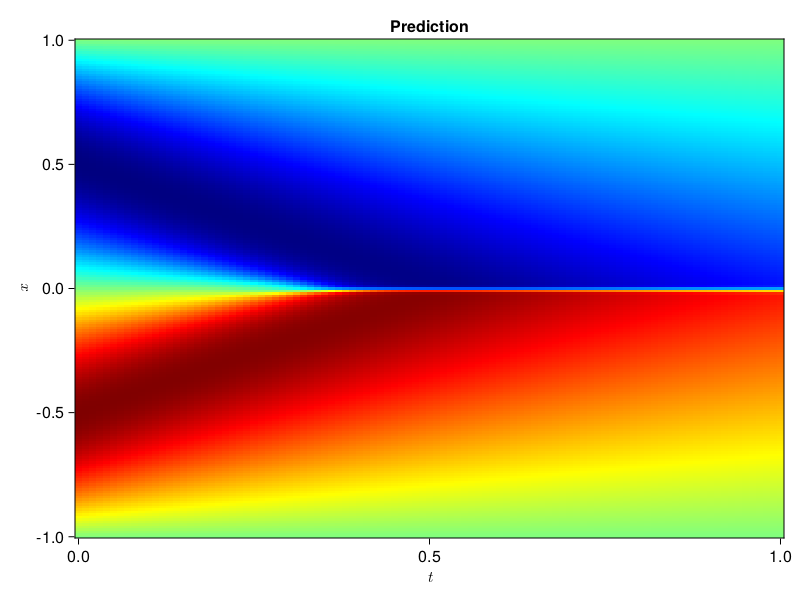

In [8]:
using CairoMakie, MakiePublication

phi = pinn.phi
ts, xs = [infimum(d.domain):0.01:supremum(d.domain) for d in pde_system.domain]
axis = (xlabel=L"t", ylabel=L"x", title="Prediction")
u_pred = [sum(pinn.phi([t, x], res.u)) for t in ts, x in xs]
heatmap(ts, xs, u_pred, axis=axis; colormap=:jet)

In [24]:
using MAT
data = matread("burgers_shock.mat")

Dict{String, Any} with 3 entries:
  "t"    => [0.0; 0.01; … ; 0.98; 0.99;;]
  "x"    => [-1.0; -0.992157; … ; 0.992157; 1.0;;]
  "usol" => [1.22465e-16 2.95362e-17 … 2.61833e-16 9.39537e-17; 0.0246374 0.023…

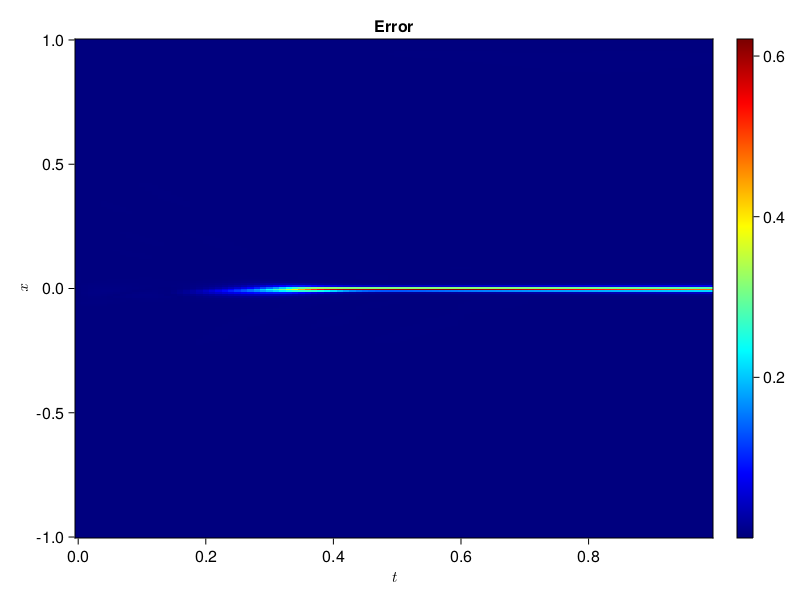

In [35]:
usol = data["usol"]

# Grid
t_star = vec(data["t"])
x_star = vec(data["x"])

u_pred = [sum(pinn.phi([t, x], res.u)) for t in t_star, x in x_star]
fig, ax, hm = heatmap(t_star, x_star, abs.(usol' - u_pred);
                      axis=(xlabel=L"t", ylabel=L"x", title="Error"), colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig

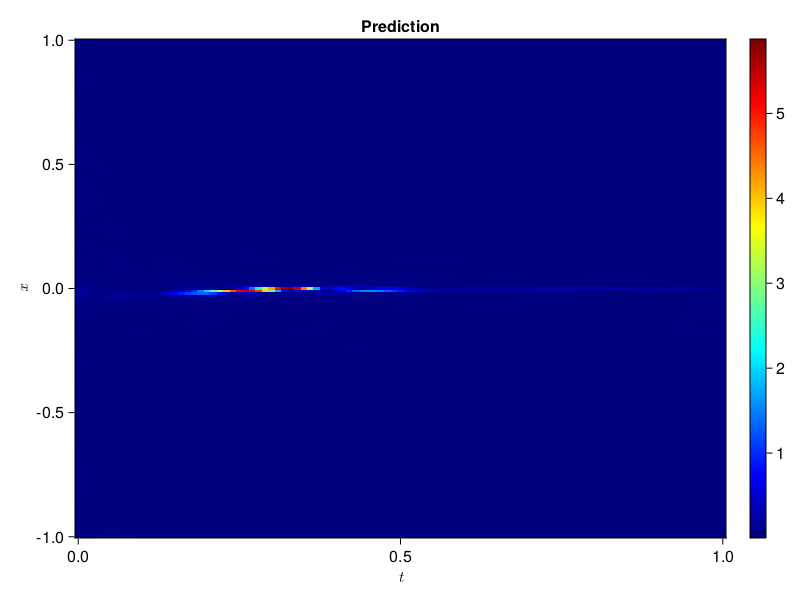

In [44]:
residual = [sum(abs, Sophon.residual_function_1([t, x], res.u)) for t in ts, x in xs]

fig, ax, hm = heatmap(ts, xs, residual, axis=axis, colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig

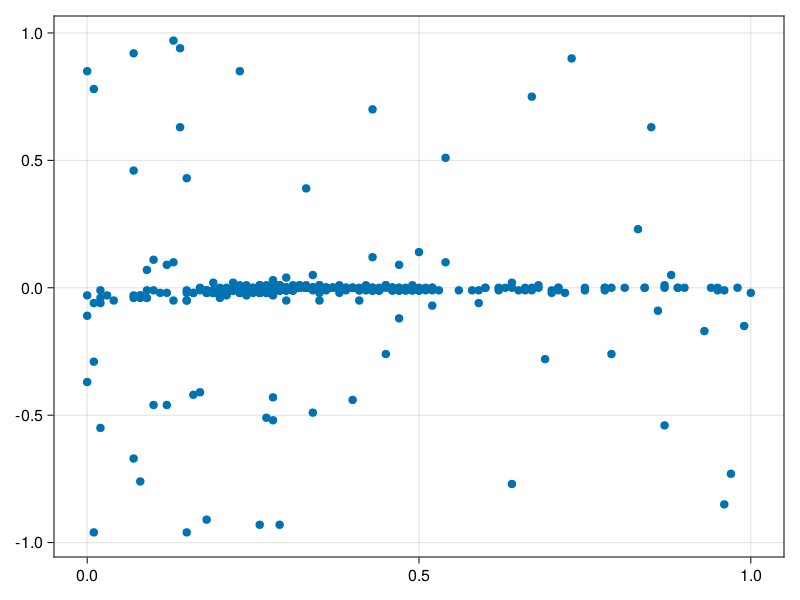

In [46]:
using StatsBase

data = vec([[t, x] for t in ts, x in xs])
wv = vec(residual)
new_data = wsample(data, wv, 500)
new_data = reduce(hcat, new_data)
fig, ax = scatter(new_data[1,:], new_data[2,:])


In [48]:
prob.p[1] = hcat(new_data, prob.p[1])

2×2500 Matrix{Float64}:
  0.52   0.21   0.31   0.35   0.27  0.67  …  0.829834   0.579834  0.079834
 -0.01  -0.01  -0.01  -0.01  -0.02  0.75     0.848145  -0.651855  0.348145

In [49]:
prob = remake(prob; u0=res.u)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [1.6866398041103305 -1.0686674286008417; 0.8265269419737351 -0.12555119592912317; … ; 1.7219417068691623 0.22673022060972836; -0.3106067017314896 -2.2739409594923026], bias = [-0.3570643037074339; 0.13907624172270466; … ; 0.050002987131958256; 0.19072862617854008;;]), layer_2 = (weight = [-0.7070952200326798 -0.1086584305977028 … 0.647860127643262 0.26616070552759546; -0.3420141935995114 -0.2900783526579979 … -0.6717975730355615 -1.0105172886567126; … ; -0.5038473389551849 -0.1018850968314233 … -0.573676100484822 1.0463717626077096; -0.6825194495557702 0.4134684753279659 … -0.3837774887055687 0.6041689497490348], bias = [0.1603165090443741; 0.14746270521003185; … ; 0.352335433055847; 0.03852195310064827;;]), layer_3 = (weight = [-0.20524577712246958 -0.8432322432569155 … -0.694534771786842 -0.7962415935382062; -0.2692512841777497 0.275405044756913 … 0.48587997377174463 -0.5287948772510259; … ; 0.415987

In [50]:
res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 1.799244292423747


Loss: 1.5648929636419802


Loss: 0.8666519607671739


Loss: 0.5143053923319015


Loss: 0.39448150340385235


Loss: 0.3616125030475059


Loss: 0.27015987201668745


Loss: 0.24775528012163933


Loss: 0.23054566837135484


Loss: 0.20207345766640014


Loss: 0.17753895022692726


Loss: 0.16725754178432656


Loss: 0.14659639355231


Loss: 0.10992558572110164


Loss: 0.09800213492652267


Loss: 0.09096555868956015


Loss: 0.08673023169953264


Loss: 0.07238757962042254


Loss: 0.061666535344669315


Loss: 0.048492271044171684


Loss: 0.04441114297174815


Loss: 0.03281304626205146


Loss: 0.028781543900102253


Loss: 0.023245419419489356


Loss: 0.021109605624806096


Loss: 0.019424774856589305


Loss: 0.018187189053230992


Loss: 0.015829716449541557


Loss: 0.014441176700030057


Loss: 0.013093704221693177


Loss: 0.011781885028247667


Loss: 0.01131832693862514


Loss: 0.010427206212989561


Loss: 0.009345839392943405


Loss: 0.00839947732362882


Loss: 0.007940107211378807


Loss: 0.007437578831215974


Loss: 0.00719832926974108


Loss: 0.00685323727697814


Loss: 0.006654638192903378


Loss: 0.006475055413299549


Loss: 0.006215893149269219


Loss: 0.006079793041135535


Loss: 0.00586512032038164


Loss: 0.005656668244653481


Loss: 0.0054581704801101956


Loss: 0.005253234823557437


Loss: 0.005033608223565157


Loss: 0.004907878400064886


Loss: 0.004755712854257367


Loss: 0.0046664185280085495


Loss: 0.004524661987732871


Loss: 0.004434149072208505


Loss: 0.0043250026332083665


Loss: 0.0042212612032383095


Loss: 0.004138886948633338


Loss: 0.004033592952281984


Loss: 0.0039208253195999855


Loss: 0.0038480478958187432


Loss: 0.0037968619003775515


Loss: 0.0037388343595838895


Loss: 0.0036669730075201113


Loss: 0.003600026712858668


Loss: 0.003546441698692301


Loss: 0.0034949383689451843


Loss: 0.0034210991183775716


Loss: 0.0033675274840633336


Loss: 0.003265925664080312


Loss: 0.003218883783920491


Loss: 0.0031645701020563046


Loss: 0.003126570145993885


Loss: 0.0030941873912004


Loss: 0.003051348813439325


Loss: 0.0030077259956566705


Loss: 0.0029742369216312053


Loss: 0.0029421282451912384


Loss: 0.0029142375485316694


Loss: 0.002873794760462553


Loss: 0.0028277769117479746


Loss: 0.0027875109017581495


Loss: 0.002755615587040662


Loss: 0.0027034866839925615


Loss: 0.002664142634261644


Loss: 0.0026267191420408444


Loss: 0.0025921501861389256


Loss: 0.0025513151100470775


Loss: 0.002521800771137492


Loss: 0.0024714467191914746


Loss: 0.002436619768119744


Loss: 0.002406113668299659


Loss: 0.0023746487710355063


Loss: 0.0023218129150328255


Loss: 0.0022926856964184863


Loss: 0.0022660713315457897


Loss: 0.0021977153942655905


Loss: 0.002173713589543258


Loss: 0.002142224003480252


Loss: 0.0021017993830714224


Loss: 0.0020753876473898992


Loss: 0.0020589956476366215


Loss: 0.002030897498258059


Loss: 0.002006087248442119


Loss: 0.00198330731342315


Loss: 0.0019560097028011587


Loss: 0.0019290786748679288


Loss: 0.0018930700993526003


Loss: 0.0018619583364047026


Loss: 0.001843708873086447


Loss: 0.0018193801058486094


Loss: 0.0017912861879927013


Loss: 0.0017678763804243264


Loss: 0.0017459857395984476


Loss: 0.0017256329502552464


Loss: 0.0016938375995452792


Loss: 0.0016617892367321693


Loss: 0.0016378173198532892


Loss: 0.0016170101624646519


Loss: 0.0015825711816722311


Loss: 0.0015553942537034164


Loss: 0.0015266717858984868


Loss: 0.0015016153501039055


Loss: 0.0014811968759549077


Loss: 0.001456927454565353


Loss: 0.0014458387526509959


Loss: 0.0014174454156812288


Loss: 0.001392745022164033


Loss: 0.0013680018569800713


Loss: 0.0013465234968203547


Loss: 0.00130787824665656


Loss: 0.0012848694136413838


Loss: 0.0012649346335498557


Loss: 0.0012427501310582972


Loss: 0.0012260177804356415


Loss: 0.0012119994202113287


Loss: 0.0011948029489873974


Loss: 0.0011750981629487906


Loss: 0.001157846171375943


Loss: 0.0011364689382270397


Loss: 0.0011209383354915297


Loss: 0.0011113794300439369


Loss: 0.0010972921539870522


Loss: 0.001090203456504863


Loss: 0.0010800629964567736


Loss: 0.0010636453854395082


Loss: 0.001047635306657514


Loss: 0.0010287821878076715


Loss: 0.0010157555983682156


Loss: 0.0010047778891726655


Loss: 0.0009904527588602027


Loss: 0.0009732950959642149


Loss: 0.0009599520543162154


Loss: 0.0009476999865637301


Loss: 0.0009358750467743613


Loss: 0.0009248329791159515


Loss: 0.0009132396858474329


Loss: 0.0008897169880398805


Loss: 0.0008689256178073384


Loss: 0.0008536971553501465


Loss: 0.0008431361053181448


Loss: 0.0008335976905802529


Loss: 0.000821432682819285


Loss: 0.0008026618714483008


Loss: 0.0007885033421770306


Loss: 0.000770799562002461


Loss: 0.0007568573412147299


Loss: 0.0007450485616150303


Loss: 0.0007269010125026833


Loss: 0.0007095605815678983


Loss: 0.0006958982469874577


Loss: 0.0006820043071608669


Loss: 0.0006672870623327606


Loss: 0.0006575890968148365


Loss: 0.0006457176706753001


Loss: 0.000629892899663667


Loss: 0.0006165458981960054


Loss: 0.0006018562919761035


Loss: 0.0005890330236406032


Loss: 0.0005763496968679555


Loss: 0.0005634467652607037


Loss: 0.0005511638724318042


Loss: 0.0005425383992117977


Loss: 0.0005308198564630653


Loss: 0.0005245217850590396


Loss: 0.0005121093743046289


Loss: 0.0005036613262751217


Loss: 0.0004951169330671599


Loss: 0.0004810025316983627


Loss: 0.00047179295314412825


Loss: 0.0004566377366634793


Loss: 0.00044565590789265834


Loss: 0.0004357947934699087


Loss: 0.00041943986859893683


Loss: 0.00040645751137737923


Loss: 0.0003985714853733232


Loss: 0.0003916531355192049


Loss: 0.000379113434401211


Loss: 0.0003673269102899256


Loss: 0.000356493204733977


Loss: 0.0003461638591938517


Loss: 0.00033669682997382983


Loss: 0.00032619727642053514


Loss: 0.0003154911472260953


Loss: 0.0003045009158931591


Loss: 0.0002955950478034581


Loss: 0.0002874480772882127


Loss: 0.0002820860534878415


Loss: 0.0002768305841396933


Loss: 0.00027328172986486614


Loss: 0.0002676264801630296


Loss: 0.0002630734451972244


Loss: 0.0002584984114236232


Loss: 0.0002563647689126699


Loss: 0.0002525907950473228


Loss: 0.00024813033527191976


Loss: 0.00024367872777141824


Loss: 0.00023949246958331302


Loss: 0.00023432011329016687


Loss: 0.00022732674626574337


Loss: 0.00022221858309478786


Loss: 0.0002186366438661302


Loss: 0.00021489646425522637


Loss: 0.00021101900556698376


Loss: 0.0002072557708375412


Loss: 0.00020457856212013022


Loss: 0.00020135487559225023


Loss: 0.00019933159866294075


Loss: 0.00019620740624269148


Loss: 0.00019338951612409382


Loss: 0.00019057083593106397


Loss: 0.00018820240991305624


Loss: 0.00018517000912327878


Loss: 0.0001822362505557456


Loss: 0.00017898428332427466


Loss: 0.00017696510774513542


Loss: 0.0001750830818545518


Loss: 0.00017251915057895064


Loss: 0.00017042055055940466


Loss: 0.00016847608447669732


Loss: 0.00016724419601263796


Loss: 0.00016524115643822975


Loss: 0.0001628925790838377


Loss: 0.00015844527757573874


Loss: 0.00015540598492808658


Loss: 0.00015375185073346353


Loss: 0.00015261146451771336


Loss: 0.0001508494975947444


Loss: 0.00014890338573561934


Loss: 0.00014664316458429578


Loss: 0.00014529378606327416


Loss: 0.0001431465999881763


Loss: 0.0001412418263587975


Loss: 0.00013861304898035595


Loss: 0.00013610515472243712


Loss: 0.00013310041963940762


Loss: 0.00012933241857040743


Loss: 0.00012622016052045502


Loss: 0.00012383318383318582


Loss: 0.00012225161240574532


Loss: 0.00012108571474756034


Loss: 0.0001195113432498492


Loss: 0.00011823083473316472


Loss: 0.00011645828710590267


Loss: 0.00011456839314451344


Loss: 0.00011294958950046849


Loss: 0.00011077934361651209


Loss: 0.0001092755580406511


Loss: 0.00010792999584085024


Loss: 0.00010661775135127986


Loss: 0.00010549261917102924


Loss: 0.00010375637752051882


Loss: 0.00010210444172929317


Loss: 0.00010073564878314912


Loss: 9.930919856067633e-5


Loss: 9.762925577310495e-5


Loss: 9.644927932963256e-5


Loss: 9.52603933362528e-5


Loss: 9.432419955623918e-5


Loss: 9.269580102797617e-5


Loss: 9.083466099020752e-5


Loss: 8.95214492170433e-5


Loss: 8.84854977516952e-5


Loss: 8.665541794053606e-5


Loss: 8.47501165346219e-5


Loss: 8.319712490658714e-5


Loss: 8.20135408248936e-5


Loss: 8.107664678351122e-5


Loss: 8.009002053301312e-5


Loss: 7.848625406920072e-5


Loss: 7.632820048518996e-5


Loss: 7.485074946215511e-5


Loss: 7.4126919620412e-5


Loss: 7.350975655612258e-5


Loss: 7.272200497534154e-5


Loss: 7.145177272852719e-5


Loss: 7.01078780922486e-5


Loss: 6.897428058817328e-5


Loss: 6.818434729743979e-5


Loss: 6.710064843681167e-5


Loss: 6.589513935516031e-5


Loss: 6.507327287351086e-5


Loss: 6.401790114140544e-5


Loss: 6.288248259347407e-5


Loss: 6.189518869418018e-5


Loss: 6.066779963537276e-5


Loss: 5.963840567260077e-5


Loss: 5.8096300349701836e-5


Loss: 5.706883859340472e-5


Loss: 5.63624477097351e-5


Loss: 5.5629038214304014e-5


Loss: 5.49119616255633e-5


Loss: 5.445447532116012e-5


Loss: 5.388688174843114e-5


Loss: 5.3288920635656816e-5


Loss: 5.2724143523064864e-5


Loss: 5.2141285334743166e-5


Loss: 5.142887881372843e-5


Loss: 5.077910605799919e-5


Loss: 5.037407154834575e-5


Loss: 4.994349805692859e-5


Loss: 4.9377393896864384e-5


Loss: 4.875226068653213e-5


Loss: 4.8193750639772485e-5


Loss: 4.7516913255904884e-5


Loss: 4.694468938687609e-5


Loss: 4.621983388571794e-5


Loss: 4.5688799723366746e-5


Loss: 4.5193921205314165e-5


Loss: 4.466136178458398e-5


Loss: 4.4208295299370515e-5


Loss: 4.3831621765658234e-5


Loss: 4.345802440336268e-5


Loss: 4.3012007666990036e-5


Loss: 4.2557431694306285e-5


Loss: 4.199130192284849e-5


Loss: 4.144047066708327e-5


Loss: 4.094608801306855e-5


Loss: 4.060308735347329e-5


Loss: 4.0304618672976516e-5


Loss: 3.990846364226475e-5


Loss: 3.951677879028633e-5


Loss: 3.9195247119274235e-5


Loss: 3.886026950938817e-5


Loss: 3.842641910591761e-5


Loss: 3.800073909708469e-5


Loss: 3.754192707284038e-5


Loss: 3.721459513188096e-5


Loss: 3.695102727745122e-5


Loss: 3.664796041332484e-5


Loss: 3.6254612968966684e-5


Loss: 3.5949909605902485e-5


Loss: 3.56740532043502e-5


Loss: 3.5377136296633204e-5


Loss: 3.5079279697747724e-5


Loss: 3.480629454489193e-5


Loss: 3.446286073398592e-5


Loss: 3.41902221548792e-5


Loss: 3.395413550794969e-5


Loss: 3.3776110997607986e-5


Loss: 3.358188459489357e-5


Loss: 3.345255185462417e-5


Loss: 3.328628320270899e-5


Loss: 3.309657944818589e-5


Loss: 3.278473922886663e-5


Loss: 3.238885498579939e-5


Loss: 3.199712079281687e-5


Loss: 3.166286299047936e-5


Loss: 3.1448591264386784e-5


Loss: 3.1187731575256224e-5


Loss: 3.098917672910183e-5


Loss: 3.0710293303654316e-5


Loss: 3.0314744606100592e-5


Loss: 2.990987391059431e-5


Loss: 2.9658615881977964e-5


Loss: 2.9386477986057797e-5


Loss: 2.9064963912861786e-5


Loss: 2.880800044850639e-5


Loss: 2.861295511357811e-5


Loss: 2.844088739770724e-5


Loss: 2.8285966973702605e-5


Loss: 2.8085284630468015e-5


Loss: 2.7946840901115494e-5


Loss: 2.7797869667239707e-5


Loss: 2.758600998014187e-5


Loss: 2.72811325876405e-5


Loss: 2.6976582505885955e-5


Loss: 2.6706213720670926e-5


Loss: 2.6481631149363746e-5


Loss: 2.6319681627296944e-5


Loss: 2.6150924718080746e-5


Loss: 2.595385488242446e-5


Loss: 2.577788400601644e-5


Loss: 2.556015070852183e-5


Loss: 2.5310951818069135e-5


Loss: 2.5119833140953106e-5


Loss: 2.496363774888022e-5


Loss: 2.4720846317977657e-5


Loss: 2.4363506434916153e-5


Loss: 2.4063304262635974e-5


Loss: 2.3815738197813022e-5


Loss: 2.3564960885465135e-5


Loss: 2.3373303893504566e-5


Loss: 2.3227737038658115e-5


Loss: 2.310169562041339e-5


Loss: 2.2887160499796907e-5


Loss: 2.2596273608445096e-5


Loss: 2.239671849533272e-5


Loss: 2.2234526704470285e-5


Loss: 2.2144983836874585e-5


Loss: 2.204735872263785e-5


Loss: 2.1953982739697136e-5


Loss: 2.184699509568205e-5


Loss: 2.1731665147015736e-5


Loss: 2.1572416871674936e-5


Loss: 2.1371072207350995e-5


Loss: 2.123656647208056e-5


Loss: 2.1111690104066514e-5


Loss: 2.0990146576925785e-5


Loss: 2.085266927035128e-5


Loss: 2.070676116174096e-5


Loss: 2.053401046535193e-5


Loss: 2.0394826852943083e-5


Loss: 2.024488065828048e-5


Loss: 2.0150325295169492e-5


Loss: 2.0011383205159528e-5


Loss: 1.9836841971816704e-5


Loss: 1.9705928423531223e-5


Loss: 1.9611113736200724e-5


Loss: 1.9470294262369393e-5


Loss: 1.9290525931315053e-5


Loss: 1.915001721023349e-5


Loss: 1.9000902454622747e-5


Loss: 1.8881332985030738e-5


Loss: 1.8761399212573008e-5


Loss: 1.8631359376813486e-5


Loss: 1.8467968636032726e-5


Loss: 1.8344073617760097e-5


Loss: 1.8202055042305755e-5


Loss: 1.8037604915505867e-5


Loss: 1.7873889978433783e-5


Loss: 1.7758599950435318e-5


Loss: 1.7645601129600576e-5


Loss: 1.7534377847710035e-5


Loss: 1.7416002442429384e-5


Loss: 1.7328276435200303e-5


Loss: 1.7224489218621007e-5


Loss: 1.710912543998022e-5


Loss: 1.69489487026702e-5


Loss: 1.67299570084477e-5


Loss: 1.6561535243172717e-5


Loss: 1.6455461017011144e-5


Loss: 1.6375636413538695e-5


Loss: 1.629568856872519e-5


Loss: 1.6159166517965506e-5


Loss: 1.594081075164885e-5


Loss: 1.5720115913021154e-5


Loss: 1.555904589845301e-5


Loss: 1.5438982687229685e-5


Loss: 1.5368655573345683e-5


Loss: 1.5300907527687103e-5


Loss: 1.5211638491206091e-5


Loss: 1.5129168996487772e-5


Loss: 1.5053466042267474e-5


Loss: 1.4965411665864457e-5


Loss: 1.4856948610410995e-5


Loss: 1.4710070592092857e-5


Loss: 1.4585143995416197e-5


Loss: 1.4488692476761285e-5


Loss: 1.4389485430085882e-5


Loss: 1.4287361333006974e-5


Loss: 1.416923659717185e-5


Loss: 1.4053673794150582e-5


Loss: 1.3911158562301689e-5


Loss: 1.3774274212521368e-5


Loss: 1.3651189000372034e-5


Loss: 1.3534277034670282e-5


Loss: 1.345417732321475e-5


Loss: 1.3385485070959614e-5


Loss: 1.332558056605911e-5


Loss: 1.3249385681910442e-5


Loss: 1.3160294354373193e-5


Loss: 1.3074351513340825e-5


Loss: 1.2982953862159228e-5


Loss: 1.2918848004353343e-5


Loss: 1.2837339407200966e-5


Loss: 1.2768720853200758e-5


Loss: 1.2710987433148047e-5


Loss: 1.2639132130525114e-5


Loss: 1.2556148206140517e-5


Loss: 1.2499139675942182e-5


Loss: 1.2460184326267558e-5


Loss: 1.2413347877876907e-5


Loss: 1.2352261308843575e-5


Loss: 1.2292898648285594e-5


Loss: 1.2221615356401128e-5


Loss: 1.216821776313867e-5


Loss: 1.2108698951029553e-5


Loss: 1.2040727017140984e-5


Loss: 1.1966493959102612e-5


Loss: 1.1903566930897438e-5


Loss: 1.1854580809839458e-5


Loss: 1.1798613382941613e-5


Loss: 1.173758820210382e-5


Loss: 1.1665289714679456e-5


Loss: 1.1580305385219189e-5


Loss: 1.1511167255215871e-5


Loss: 1.1443640595157984e-5


Loss: 1.1382035881326416e-5


Loss: 1.1324538126547294e-5


Loss: 1.1273644911228262e-5


Loss: 1.12290451220143e-5


Loss: 1.1146082007217058e-5


Loss: 1.1024591046355523e-5


Loss: 1.0885799279472785e-5


Loss: 1.0773321807336568e-5


Loss: 1.065492424905618e-5


Loss: 1.0579250401620406e-5


Loss: 1.052207478618446e-5


Loss: 1.0467699626027325e-5


Loss: 1.041597262208388e-5


Loss: 1.0374241463311315e-5


Loss: 1.0344499716472332e-5


Loss: 1.0312824185429718e-5


Loss: 1.0277349314544609e-5


Loss: 1.021265036013746e-5


Loss: 1.0146582042581072e-5


Loss: 1.009913069113182e-5


Loss: 1.0064830228355852e-5


Loss: 1.0039666559804598e-5


Loss: 1.0009640499863825e-5


Loss: 9.957210147551165e-6


Loss: 9.892545795552094e-6


Loss: 9.821477173144832e-6


Loss: 9.768821979407439e-6


Loss: 9.717214294214564e-6


Loss: 9.676293486967588e-6


Loss: 9.636427505047044e-6


Loss: 9.580275919785402e-6


Loss: 9.50481162550274e-6


Loss: 9.429938475903357e-6


Loss: 9.367718591620675e-6


Loss: 9.327284209682363e-6


Loss: 9.29539401747579e-6


Loss: 9.27184817100006e-6


Loss: 9.251630893562058e-6


Loss: 9.230034273158662e-6


Loss: 9.201048106392663e-6


Loss: 9.147213079280524e-6


Loss: 9.066320724416327e-6


Loss: 8.993815924133628e-6


Loss: 8.927032088576995e-6


Loss: 8.879079686019862e-6


Loss: 8.83598648641753e-6


Loss: 8.786977346619768e-6


Loss: 8.726160159865802e-6


Loss: 8.652799344906124e-6


Loss: 8.609193163796002e-6


Loss: 8.578110888477086e-6


Loss: 8.549799474294548e-6


Loss: 8.526285282864588e-6


Loss: 8.500850710870402e-6


Loss: 8.463838055787248e-6


Loss: 8.420617808561214e-6


Loss: 8.375223525441092e-6


Loss: 8.336888833343694e-6


Loss: 8.302636965105709e-6


Loss: 8.272029663672922e-6


Loss: 8.23314239349617e-6


Loss: 8.207564925578652e-6


Loss: 8.190589314007252e-6


Loss: 8.173757669649563e-6


Loss: 8.146670501932726e-6


Loss: 8.095155971299843e-6


Loss: 8.035344652622365e-6


Loss: 7.963173431323044e-6


Loss: 7.896915398387024e-6


Loss: 7.851000769590532e-6


Loss: 7.813493180471364e-6


Loss: 7.782145419778977e-6


Loss: 7.764152323751134e-6


Loss: 7.745061385160053e-6


Loss: 7.714919348146589e-6


Loss: 7.65847328644539e-6


Loss: 7.601401218639458e-6


Loss: 7.535011668758731e-6


Loss: 7.493566367470997e-6


Loss: 7.461723790815344e-6


Loss: 7.43719499390591e-6


Loss: 7.40949101533722e-6


Loss: 7.3855069779239605e-6


Loss: 7.352820900723486e-6


Loss: 7.297266556528086e-6


Loss: 7.2456539590700635e-6


Loss: 7.18766142268362e-6


Loss: 7.144351554408113e-6


Loss: 7.104399839528406e-6


Loss: 7.07262636480873e-6


Loss: 7.051756413579247e-6


Loss: 7.030736253575855e-6


Loss: 7.00592604653622e-6


Loss: 6.984600073637146e-6


Loss: 6.963462640604232e-6


Loss: 6.940741905829502e-6


Loss: 6.91174239417112e-6


Loss: 6.882436661120763e-6


Loss: 6.840588359183053e-6


Loss: 6.781769445317471e-6


Loss: 6.69539614111113e-6


Loss: 6.6290645785290236e-6


Loss: 6.560335748128338e-6


Loss: 6.523107149016774e-6


Loss: 6.496034643270067e-6


Loss: 6.481405725486993e-6


Loss: 6.470342780598273e-6


Loss: 6.449250100937139e-6


Loss: 6.416375489397133e-6


Loss: 6.37492820163185e-6


Loss: 6.338154049403172e-6


Loss: 6.294226973170016e-6


Loss: 6.234295318047868e-6


Loss: 6.167510194390546e-6


Loss: 6.12094736175653e-6


Loss: 6.0613022573955414e-6


Loss: 6.001865465804177e-6


Loss: 5.959869580738235e-6


Loss: 5.924104808009311e-6


Loss: 5.899372427759838e-6


Loss: 5.8739139731900475e-6


Loss: 5.851541986958026e-6


Loss: 5.837079845758737e-6


Loss: 5.822664554123371e-6


Loss: 5.810700062681201e-6


Loss: 5.7948548756207685e-6


Loss: 5.774839586884454e-6


Loss: 5.740300420747778e-6


Loss: 5.706160357833854e-6


Loss: 5.670305393820902e-6


Loss: 5.638615627669365e-6


Loss: 5.610415261937969e-6


Loss: 5.5930482133501456e-6


Loss: 5.582031388714082e-6


Loss: 5.572824992805841e-6


Loss: 5.56270173838807e-6


Loss: 5.5521209309112525e-6


Loss: 5.538660922596484e-6


Loss: 5.523945231758258e-6


Loss: 5.503652439222561e-6


Loss: 5.464856889645969e-6


Loss: 5.420364923402054e-6


Loss: 5.387161467874358e-6


Loss: 5.359213274806541e-6


Loss: 5.336852442396463e-6


Loss: 5.307527888581049e-6


Loss: 5.280538247927931e-6


Loss: 5.263698855184038e-6


Loss: 5.247506227001148e-6


Loss: 5.230810122331416e-6


Loss: 5.211551175569493e-6


Loss: 5.187347034111456e-6


Loss: 5.152477570583563e-6


Loss: 5.130052241163218e-6


Loss: 5.110569502668472e-6


Loss: 5.091347547556215e-6


Loss: 5.0747737965227535e-6


Loss: 5.059319899978421e-6


Loss: 5.04480111606556e-6


Loss: 5.028449686643422e-6


Loss: 5.012465519108702e-6


Loss: 4.992904447942369e-6


Loss: 4.961489090016557e-6


Loss: 4.92318110600652e-6


Loss: 4.878082099705532e-6


Loss: 4.8431229003973126e-6


Loss: 4.816000897094652e-6


Loss: 4.794297005980587e-6


Loss: 4.780935407040343e-6


Loss: 4.764437981935893e-6


Loss: 4.748908749153052e-6


Loss: 4.741025399119625e-6


Loss: 4.733858672098817e-6


Loss: 4.722365946112561e-6


Loss: 4.705379627075837e-6


Loss: 4.6868510212109706e-6


Loss: 4.658489111855851e-6


Loss: 4.623888821446604e-6


Loss: 4.574709791836667e-6


Loss: 4.529983665464815e-6


Loss: 4.502610050509577e-6


Loss: 4.48292940155047e-6


Loss: 4.4697686837831565e-6


Loss: 4.4606210630364165e-6


Loss: 4.451868073673869e-6


Loss: 4.4398831521149215e-6


Loss: 4.429666714497401e-6


Loss: 4.417473211088509e-6


Loss: 4.393653661779144e-6


Loss: 4.370621265488465e-6


Loss: 4.346515824484383e-6


Loss: 4.327901865171842e-6


Loss: 4.309755713217048e-6


Loss: 4.290863650580229e-6


Loss: 4.274937182164154e-6


Loss: 4.261810196377804e-6


Loss: 4.2521066881953995e-6


Loss: 4.244195969028875e-6


Loss: 4.235646621323122e-6


Loss: 4.22473702512607e-6


Loss: 4.2087122073019985e-6


Loss: 4.173116248810293e-6


Loss: 4.126387874726128e-6


Loss: 4.0777008111789734e-6


Loss: 4.0471298297041295e-6


Loss: 4.026739296621161e-6


Loss: 4.011715331946477e-6


Loss: 3.999313966875821e-6


Loss: 3.991729628111306e-6


Loss: 3.98661519345587e-6


Loss: 3.9808005205302615e-6


Loss: 3.9734358269343155e-6


Loss: 3.962793541589138e-6


Loss: 3.943168242577826e-6


Loss: 3.920538611099287e-6


Loss: 3.902029339523331e-6


Loss: 3.8768512143978755e-6


Loss: 3.846066182774181e-6


Loss: 3.8115571827043743e-6


Loss: 3.7556421027887212e-6


Loss: 3.6933769316195406e-6


Loss: 3.659002972966831e-6


Loss: 3.641127372179387e-6


Loss: 3.629322307469923e-6


Loss: 3.622247823746495e-6


Loss: 3.6180788161521804e-6


Loss: 3.6112329283583985e-6


Loss: 3.604069657692215e-6


Loss: 3.5914379419608813e-6


Loss: 3.571167685374685e-6


Loss: 3.5437319043030207e-6


Loss: 3.511780937205771e-6


Loss: 3.488695220940287e-6


Loss: 3.469184934410359e-6


Loss: 3.4544621557201425e-6


Loss: 3.4399613941096146e-6


Loss: 3.4271368499307506e-6


Loss: 3.4196793133717406e-6


Loss: 3.4140886634278826e-6


Loss: 3.408132231580856e-6


Loss: 3.400127001578077e-6


Loss: 3.3901278119980883e-6


Loss: 3.3772595930899525e-6


Loss: 3.3619237903928035e-6


Loss: 3.3452432478882255e-6


Loss: 3.3244314160521763e-6


Loss: 3.308637744532559e-6


Loss: 3.2911022024129013e-6


Loss: 3.27346607403001e-6


Loss: 3.2598385858852407e-6


Loss: 3.2513845014004813e-6


Loss: 3.2461161722049235e-6


Loss: 3.24237744108031e-6


Loss: 3.2385190415327222e-6


Loss: 3.232504406915531e-6


Loss: 3.224233167641376e-6


Loss: 3.213496557821926e-6


Loss: 3.1944720815267587e-6


Loss: 3.1705612630398474e-6


Loss: 3.1521088709725417e-6


Loss: 3.1363859673089974e-6


Loss: 3.1209440231113986e-6


Loss: 3.110122014330651e-6


Loss: 3.102998439842075e-6


Loss: 3.0972700801270086e-6


Loss: 3.0933176767500983e-6


Loss: 3.0880122526058224e-6


Loss: 3.082515033743185e-6


Loss: 3.075969334552754e-6


Loss: 3.066528447270027e-6


Loss: 3.055377836270292e-6


Loss: 3.0423406910996754e-6


Loss: 3.0275958882798944e-6


Loss: 3.0117283070958572e-6


Loss: 3.005460281666524e-6


Loss: 3.0002681475611742e-6


Loss: 2.9954326770124196e-6


Loss: 2.9892414672405276e-6


Loss: 2.9820550860386e-6


Loss: 2.9740302456262286e-6


Loss: 2.9636478597144913e-6


Loss: 2.9501034602093884e-6


Loss: 2.931673009882837e-6


Loss: 2.9129944439592315e-6


Loss: 2.9045224844203762e-6


Loss: 2.8995174895483253e-6


Loss: 2.895849170306504e-6


Loss: 2.891431087275508e-6


Loss: 2.8852712042236047e-6


Loss: 2.8787395856057374e-6


Loss: 2.871912765677499e-6


Loss: 2.864452896139135e-6


Loss: 2.8551276666379918e-6


Loss: 2.8411093152185966e-6


Loss: 2.816930067223642e-6


Loss: 2.8021453067246965e-6


Loss: 2.7948818050874465e-6


Loss: 2.7902840619998825e-6


Loss: 2.7872790487129898e-6


Loss: 2.7845483380139942e-6


Loss: 2.7815478445599835e-6


Loss: 2.7757605498182276e-6


Loss: 2.767938412135366e-6


Loss: 2.759977692429363e-6


Loss: 2.7487787763052647e-6


Loss: 2.7324101815891185e-6


Loss: 2.710290669621964e-6


Loss: 2.693306760977496e-6


Loss: 2.6855254167028623e-6


Loss: 2.68021535086957e-6


Loss: 2.6761336647997366e-6


Loss: 2.6741797515827177e-6


Loss: 2.6725725298541987e-6


Loss: 2.6711084296212035e-6


Loss: 2.6679051996113653e-6


Loss: 2.6606612752141117e-6


Loss: 2.652897003002864e-6


Loss: 2.6445276716277704e-6


Loss: 2.6371976868594663e-6


Loss: 2.6272156954255564e-6


Loss: 2.6166531383785555e-6


Loss: 2.6052568158951084e-6


Loss: 2.597437899869689e-6


Loss: 2.591474254141854e-6


Loss: 2.587934962086116e-6


Loss: 2.5853923145041046e-6


Loss: 2.5838181543571075e-6


Loss: 2.5815830202618977e-6


Loss: 2.5770416299420783e-6


Loss: 2.566181088069126e-6


Loss: 2.5504839226570997e-6


Loss: 2.526682809186614e-6


Loss: 2.5029599456583105e-6


Loss: 2.484251712003625e-6


Loss: 2.4636361423861653e-6


Loss: 2.4480479173397946e-6


Loss: 2.4322160780948133e-6


Loss: 2.4244427101267116e-6


Loss: 2.414417294473954e-6


Loss: 2.407851738623389e-6


Loss: 2.4022223048668595e-6


Loss: 2.3974233025046908e-6


Loss: 2.3927157892271945e-6


Loss: 2.3878045309762296e-6


Loss: 2.3848514015378e-6


Loss: 2.3812103314584173e-6


Loss: 2.3774062757723897e-6


Loss: 2.3723931802626583e-6


Loss: 2.3671496129679784e-6


Loss: 2.3609049539499726e-6


Loss: 2.3512415581070063e-6


Loss: 2.3424602403398455e-6


Loss: 2.3305489501778124e-6


Loss: 2.315089169141668e-6


Loss: 2.301546901781537e-6


Loss: 2.2909774998702027e-6


Loss: 2.2816124314668733e-6


Loss: 2.2756685018442382e-6


Loss: 2.267580320572001e-6


Loss: 2.2580436484521815e-6


Loss: 2.2533275730102606e-6


Loss: 2.2475490848647205e-6


Loss: 2.2430516117051995e-6


Loss: 2.2390419733746145e-6


Loss: 2.2349198913105717e-6


Loss: 2.2290334473376117e-6


Loss: 2.2235422870548976e-6


Loss: 2.2175911595108574e-6


Loss: 2.2079731091567985e-6


Loss: 2.1960666394118188e-6


Loss: 2.1819196260446984e-6


Loss: 2.1649277535980565e-6


Loss: 2.1453230255794345e-6


Loss: 2.1286076072720356e-6


Loss: 2.111013244758671e-6


Loss: 2.098499699997473e-6


Loss: 2.0914371282140673e-6


Loss: 2.086139579422981e-6


Loss: 2.082774951886355e-6


Loss: 2.0789218460706993e-6


Loss: 2.0750590405301964e-6


Loss: 2.0730580661685132e-6


Loss: 2.0713240763792896e-6


Loss: 2.069360590037642e-6


Loss: 2.067147784117468e-6


Loss: 2.064241111345019e-6


Loss: 2.060522415493436e-6


Loss: 2.0564153767264407e-6


Loss: 2.0516669774650454e-6


Loss: 2.0461301703873475e-6


Loss: 2.0422782532207767e-6


Loss: 2.0368085488680595e-6


Loss: 2.0323056456074654e-6


Loss: 2.027102702834677e-6


Loss: 2.0220147020914284e-6


Loss: 2.0155699505022163e-6


Loss: 2.0062036053247052e-6


Loss: 1.9946911727721013e-6


Loss: 1.983370971623047e-6


Loss: 1.9735403881695614e-6


Loss: 1.9682734571942874e-6


Loss: 1.9636448749239745e-6


Loss: 1.9604004107915827e-6


Loss: 1.958116503606823e-6


Loss: 1.9559940402883457e-6


Loss: 1.9534887836395608e-6


Loss: 1.9505141713072706e-6


Loss: 1.9469732150572832e-6


Loss: 1.94361454235917e-6


Loss: 1.9390446462609225e-6


Loss: 1.9327060054390657e-6


Loss: 1.921539689387219e-6


Loss: 1.9043047886131495e-6


Loss: 1.888286968817748e-6


Loss: 1.8739620818524037e-6


Loss: 1.861884520784311e-6


Loss: 1.853400281734052e-6


Loss: 1.8484871576763919e-6


Loss: 1.84488873809198e-6


Loss: 1.8434756612605276e-6


Loss: 1.8423370100061066e-6


Loss: 1.8415414962521988e-6


Loss: 1.8402398470537131e-6


Loss: 1.8377750354713778e-6


Loss: 1.8333624431281795e-6


Loss: 1.8258179918723053e-6


Loss: 1.8159196637401365e-6


Loss: 1.8081484058811146e-6


Loss: 1.8008846586757773e-6


Loss: 1.7940936490760433e-6


Loss: 1.787789005274398e-6


Loss: 1.7834202692745283e-6


Loss: 1.7798463432833208e-6


Loss: 1.7766128313731006e-6


Loss: 1.7738588930850082e-6


Loss: 1.7716196914143008e-6


Loss: 1.7699889887141314e-6


Loss: 1.7683982241258782e-6


Loss: 1.7669027914472444e-6


Loss: 1.7656168248842595e-6


Loss: 1.7630970677667047e-6


Loss: 1.7589361257040437e-6


Loss: 1.754354501084645e-6


Loss: 1.7497000582087347e-6


Loss: 1.741221566867247e-6


Loss: 1.7315581281219262e-6


Loss: 1.72349078769601e-6


Loss: 1.7175041786075553e-6


Loss: 1.7123958773607067e-6


Loss: 1.7077695078791215e-6


Loss: 1.7041686605685657e-6


Loss: 1.7019369548707308e-6


Loss: 1.700209142921236e-6


Loss: 1.6988696371389086e-6


Loss: 1.6973515031277802e-6


Loss: 1.6959251671745232e-6


Loss: 1.6946824735184315e-6


Loss: 1.6928530898109778e-6


Loss: 1.6906165297151657e-6


Loss: 1.6858517056942511e-6


Loss: 1.6768616498219526e-6


Loss: 1.6656221020741176e-6


Loss: 1.6566688298760869e-6


Loss: 1.6518215496689827e-6


Loss: 1.64723321189974e-6


Loss: 1.6432998369797027e-6


Loss: 1.6383850297349085e-6


Loss: 1.6337595697109947e-6


Loss: 1.629902321324637e-6


Loss: 1.62717959901262e-6


Loss: 1.625697927594533e-6


Loss: 1.6243533693002317e-6


Loss: 1.6228410883935649e-6


Loss: 1.6210738826495855e-6


Loss: 1.618482812532197e-6


Loss: 1.6159540347404783e-6


Loss: 1.6137681281898355e-6


Loss: 1.6120034062742022e-6


Loss: 1.6106493463135518e-6


Loss: 1.6092126557669575e-6


Loss: 1.6072275693706182e-6


Loss: 1.6056819143458249e-6


Loss: 1.6035422966677219e-6


Loss: 1.6009257646267305e-6


Loss: 1.5971011650449474e-6


Loss: 1.5933628530576468e-6


Loss: 1.5886576596367974e-6


Loss: 1.5818848771697468e-6


Loss: 1.572644668190286e-6


Loss: 1.565855106947807e-6


Loss: 1.5593164327280567e-6


Loss: 1.552366512583334e-6


Loss: 1.5461494486288099e-6


Loss: 1.5414221577988613e-6


Loss: 1.5371809749709512e-6


u: ComponentVector{Float64}(layer_1 = (weight = [1.9711362586283923 -0.857043373251157; 0.807376823097405 -0.11786769974994626; … ; 1.8742572373960042 0.1721113310917615; -0.42677447927517986 -2.3644594883509744], bias = [-0.546052509681572; 0.23359104582997606; … ; 0.08348841850850007; 0.3067794025591415;;]), layer_2 = (weight = [-0.7317107866525221 -0.08796249693152611 … 0.6117008156022464 0.17993553830459397; -0.33704870965646727 -0.31640139066189704 … -0.9131707928995965 -1.0098362970586798; … ; -0.5950306336137726 -0.07587849064291077 … -0.5511478617729751 1.0992022650771367; -0.6780568734718254 0.36021178310575197 … -0.3828464079054585 0.5910813769121336], bias = [0.16101178895272725; 0.3887508364886901; … ; 0.35313884903026055; 0.030829404786754167;;]), layer_3 = (weight = [-0.10892162178005965 -1.0795401920059506 … -0.7188063865291178 -0.810071413003003; -0.2870635695432733 0.38429760629547227 … 0.4730995301393102 -0.41711797187109284; … ; 0.384836234024859 -1.8394130077864783 

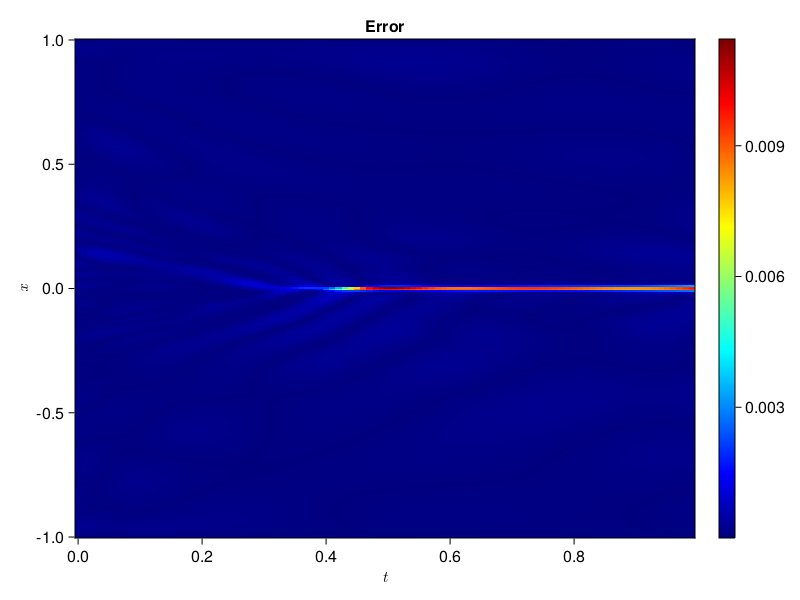

In [52]:
u_pred = [sum(pinn.phi([t, x], res.u)) for t in t_star, x in x_star]
fig, ax, hm = heatmap(t_star, x_star, abs.(usol' - u_pred);
                      axis=(xlabel=L"t", ylabel=L"x", title="Error"), colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig

In [54]:
prob = remake(prob; u0=res.u)
res = Optimization.solve(prob, BFGS(); maxiters=1000, callback=callback)

Loss: 1.5371809749709512e-6


Loss: 1.5370544064181042e-6


Loss: 1.5368096188932104e-6


Loss: 1.5366964377071327e-6


Loss: 1.5365905815453294e-6


Loss: 1.5364725766405166e-6


Loss: 1.5364265156887707e-6


Loss: 1.5364035004666857e-6


Loss: 1.5363288836784904e-6


Loss: 1.5362088440941023e-6


Loss: 1.5361111371759824e-6


Loss: 1.5360429275165022e-6


Loss: 1.5359959545287069e-6


Loss: 1.5358988294012315e-6


Loss: 1.535837190608721e-6


Loss: 1.5357752053204757e-6


Loss: 1.5356890548581804e-6


Loss: 1.5356388129470992e-6


Loss: 1.5354635836148732e-6


Loss: 1.535150756835131e-6


Loss: 1.5350303425876743e-6


Loss: 1.5344908711626114e-6


Loss: 1.5341716184480733e-6


Loss: 1.533730686075534e-6


Loss: 1.5333116536608246e-6


Loss: 1.5324220658993864e-6


Loss: 1.531937359347609e-6


Loss: 1.5306960873698867e-6


Loss: 1.5294308514836782e-6


Loss: 1.5284630381960882e-6


Loss: 1.526967885782702e-6


Loss: 1.5252311187915803e-6


Loss: 1.523786716679409e-6


Loss: 1.5226632171594748e-6


Loss: 1.5209765792891675e-6


Loss: 1.519766083944218e-6


Loss: 1.5183703886556608e-6


Loss: 1.516508094144871e-6


Loss: 1.513620928797611e-6


Loss: 1.5112220004524962e-6


Loss: 1.5089034111329453e-6


Loss: 1.506084803422447e-6


Loss: 1.5045470680333521e-6


Loss: 1.5033498019473214e-6


Loss: 1.5017672733126834e-6


Loss: 1.4995799021718553e-6


Loss: 1.4978862302078463e-6


Loss: 1.4954656399755042e-6


Loss: 1.493136756169678e-6


Loss: 1.491255081749314e-6


Loss: 1.4900960927581978e-6


Loss: 1.4885567644606602e-6


Loss: 1.4869001377169218e-6


Loss: 1.4851220615860753e-6


Loss: 1.4832872675970358e-6


Loss: 1.480617411436687e-6


Loss: 1.4783483844781235e-6


Loss: 1.47566739604767e-6


Loss: 1.4727814547715773e-6


Loss: 1.471110294293553e-6


Loss: 1.4687120115284336e-6


Loss: 1.467181364396641e-6


Loss: 1.4648022402140806e-6


Loss: 1.4627546025508618e-6


Loss: 1.4592531858548225e-6


Loss: 1.457208361623937e-6


Loss: 1.4554386654238748e-6


Loss: 1.454036621514597e-6


Loss: 1.4497716644508623e-6


Loss: 1.4469010459878206e-6


Loss: 1.4447133975744352e-6


Loss: 1.4427470111055493e-6


Loss: 1.4409925156698158e-6


Loss: 1.4371067567823333e-6


Loss: 1.4345600465477403e-6


Loss: 1.4322743540241891e-6


Loss: 1.4309750568086173e-6


Loss: 1.4284588434297058e-6


Loss: 1.4264944616506407e-6


Loss: 1.4250407345940253e-6


Loss: 1.4227268258407765e-6


Loss: 1.4203180509296178e-6


Loss: 1.4191584911813032e-6


Loss: 1.4170426987237651e-6


Loss: 1.4143350324045467e-6


Loss: 1.4126348003497124e-6


Loss: 1.4108889989447418e-6


Loss: 1.4090999004838708e-6


Loss: 1.407421002420426e-6


Loss: 1.405254130765038e-6


Loss: 1.4014967390110743e-6


Loss: 1.399449968276784e-6


Loss: 1.3975780614651394e-6


Loss: 1.3958172857512845e-6


Loss: 1.3931114802399794e-6


Loss: 1.3909989921821613e-6


Loss: 1.3898257326436205e-6


Loss: 1.386196556582413e-6


Loss: 1.381141216815102e-6


Loss: 1.3788432937571236e-6


Loss: 1.3778300591882396e-6


Loss: 1.3761039560459151e-6


Loss: 1.3715822344256873e-6


Loss: 1.3694853214732369e-6


Loss: 1.3679938880642234e-6


Loss: 1.364742208001155e-6


Loss: 1.3596948639778502e-6


Loss: 1.3558215744381637e-6


Loss: 1.3532149724387058e-6


Loss: 1.3501582427296744e-6


Loss: 1.346842544296794e-6


Loss: 1.3446857880710922e-6


Loss: 1.3407970646396546e-6


Loss: 1.335222369717095e-6


Loss: 1.3326940564617789e-6


Loss: 1.3301535934078924e-6


Loss: 1.3270457292833977e-6


Loss: 1.3239404335156692e-6


Loss: 1.3209406095592448e-6


Loss: 1.317637607849601e-6


Loss: 1.3156771664151604e-6


Loss: 1.3140851497745918e-6


Loss: 1.312513503972191e-6


Loss: 1.311206445702916e-6


Loss: 1.3097153331770743e-6


Loss: 1.3043580039641172e-6


Loss: 1.299682110648693e-6


Loss: 1.2979870442903808e-6


Loss: 1.2965925052817935e-6


Loss: 1.2949665669017127e-6


Loss: 1.2920619224513201e-6


Loss: 1.2907346443654027e-6


Loss: 1.2901254051418385e-6


Loss: 1.2888190091550145e-6


Loss: 1.285985260595993e-6


Loss: 1.2833432348832898e-6


Loss: 1.2824064830722806e-6


Loss: 1.2808496117064949e-6


Loss: 1.2772494508116569e-6


Loss: 1.2731463159407105e-6


Loss: 1.2713405747512943e-6


Loss: 1.2693939959572796e-6


Loss: 1.2664390240467545e-6


Loss: 1.264877295002974e-6


Loss: 1.263766570183724e-6


Loss: 1.2623770553187256e-6


Loss: 1.2597864108702097e-6


Loss: 1.2566032919027613e-6


Loss: 1.2535077327495742e-6


Loss: 1.2521189625526649e-6


Loss: 1.2511496865797655e-6


Loss: 1.2490796334066226e-6


Loss: 1.245547100639396e-6


Loss: 1.2415490057892182e-6


Loss: 1.2395958638861471e-6


Loss: 1.2387006180192933e-6


Loss: 1.2377684367882896e-6


Loss: 1.2356974262862546e-6


Loss: 1.2321491179585624e-6


Loss: 1.2290302810386559e-6


Loss: 1.228036531401742e-6


Loss: 1.226406413926832e-6


Loss: 1.2219946587419107e-6


Loss: 1.2190140184381758e-6


Loss: 1.218045507644197e-6


Loss: 1.2171273716021837e-6


Loss: 1.2157988786442408e-6


Loss: 1.2128923443564902e-6


Loss: 1.2102983309220777e-6


Loss: 1.2089271684691055e-6


Loss: 1.2080992420226799e-6


Loss: 1.207195193983436e-6


Loss: 1.2051020604326866e-6


Loss: 1.2023956640985297e-6


Loss: 1.2003378152703998e-6


Loss: 1.1984719228515375e-6


Loss: 1.196880441651548e-6


Loss: 1.1961002681131325e-6


Loss: 1.1947866850973663e-6


Loss: 1.1907881966362086e-6


Loss: 1.188982838627573e-6


Loss: 1.1882612447149182e-6


Loss: 1.1874948269854103e-6


Loss: 1.1852026135546068e-6


Loss: 1.179949365320756e-6


Loss: 1.1764819600816413e-6


Loss: 1.175529953833363e-6


Loss: 1.1749295585544873e-6


Loss: 1.1738780936981436e-6


Loss: 1.1719681345051611e-6


Loss: 1.1686067862920444e-6


Loss: 1.1670110904673271e-6


Loss: 1.1658917412624783e-6


Loss: 1.165138368916544e-6


Loss: 1.164245516409103e-6


Loss: 1.1621064757320886e-6


Loss: 1.1563244544533069e-6


Loss: 1.153834343141908e-6


Loss: 1.1531935965680225e-6


Loss: 1.1527859269214655e-6


Loss: 1.1519826940971924e-6


Loss: 1.1506840611087742e-6


Loss: 1.1484171560928e-6


Loss: 1.1465931392574675e-6


Loss: 1.1453692014318357e-6


Loss: 1.14476921296648e-6


Loss: 1.143991429371781e-6


Loss: 1.1420487619241515e-6


Loss: 1.1370441326416265e-6


Loss: 1.1348070199871094e-6


Loss: 1.1337253302441304e-6


Loss: 1.1332947077823503e-6


Loss: 1.1326616640504974e-6


Loss: 1.1319943656721909e-6


Loss: 1.1312556155989132e-6


Loss: 1.1301254073383606e-6


Loss: 1.1281493683362725e-6


Loss: 1.1236627253099807e-6


Loss: 1.1210325049311665e-6


Loss: 1.1200848519104339e-6


Loss: 1.1196690088346276e-6


Loss: 1.119212613553664e-6


Loss: 1.117756272450562e-6


Loss: 1.1125016432924054e-6


Loss: 1.1089185414081912e-6


Loss: 1.1074943563720019e-6


Loss: 1.1069392836878342e-6


Loss: 1.1064725492481313e-6


Loss: 1.1057123437990314e-6


Loss: 1.1039812834784477e-6


Loss: 1.099334722672953e-6


Loss: 1.0955548281786013e-6


Loss: 1.093957956720777e-6


Loss: 1.0930535373751798e-6


Loss: 1.0922296884381306e-6


Loss: 1.09155210623255e-6


Loss: 1.0903990723202223e-6


Loss: 1.0876970294754581e-6


Loss: 1.0842628240073785e-6


Loss: 1.081031853213477e-6


Loss: 1.0781366081854313e-6


Loss: 1.0759603620538384e-6


Loss: 1.0743554800096383e-6


Loss: 1.0733885417402511e-6


Loss: 1.072536921091453e-6


Loss: 1.0716814672067445e-6


Loss: 1.0698571857573475e-6


Loss: 1.0661444320726111e-6


Loss: 1.063681556806622e-6


Loss: 1.0622017896185064e-6


Loss: 1.0611479665837813e-6


Loss: 1.0597303368368818e-6


Loss: 1.0574542807887886e-6


Loss: 1.0548613089675555e-6


Loss: 1.0537106509701088e-6


Loss: 1.0529472201544517e-6


Loss: 1.052265476082648e-6


Loss: 1.0513211833639437e-6


Loss: 1.0494396158901781e-6


Loss: 1.0462401334504488e-6


Loss: 1.0439450884834046e-6


Loss: 1.0423881522639494e-6


Loss: 1.0412576130496556e-6


Loss: 1.0404201697680145e-6


Loss: 1.039636697054753e-6


Loss: 1.0387428833368478e-6


Loss: 1.037158354886296e-6


Loss: 1.0352976923385527e-6


Loss: 1.0323444585161363e-6


Loss: 1.030465866281196e-6


Loss: 1.0282709175227606e-6


Loss: 1.0267366867807235e-6


Loss: 1.0253215798399513e-6


Loss: 1.0240321065244805e-6


Loss: 1.0230583945736948e-6


Loss: 1.0224961453705787e-6


Loss: 1.021435208132949e-6


Loss: 1.0190544062075365e-6


Loss: 1.016140489880498e-6


Loss: 1.0134265755567798e-6


Loss: 1.0113745091204342e-6


Loss: 1.0098349503122462e-6


Loss: 1.0088187141645507e-6


Loss: 1.0081993300019592e-6


Loss: 1.0076916979869174e-6


Loss: 1.0067957439940948e-6


Loss: 1.0049124177713816e-6


Loss: 1.0021171448700196e-6


Loss: 9.992902202287605e-7


Loss: 9.972823015615244e-7


Loss: 9.965434459877332e-7


Loss: 9.958591971760706e-7


Loss: 9.951649946462195e-7


Loss: 9.941586674413986e-7


Loss: 9.926229786132963e-7


Loss: 9.902676136135003e-7


Loss: 9.882653752804723e-7


Loss: 9.866880373532518e-7


Loss: 9.852929716164125e-7


Loss: 9.841800652613743e-7


Loss: 9.82548595067148e-7


Loss: 9.808438281470281e-7


Loss: 9.795173948619527e-7


Loss: 9.786192434213206e-7


Loss: 9.77884701688206e-7


Loss: 9.77350264464992e-7


Loss: 9.765343928160554e-7


Loss: 9.747306880501474e-7


Loss: 9.71722956363752e-7


Loss: 9.690711860996998e-7


Loss: 9.673892573241849e-7


Loss: 9.66512880155097e-7


Loss: 9.660688005205808e-7


Loss: 9.656299651881085e-7


Loss: 9.647830468277337e-7


Loss: 9.63322398879311e-7


Loss: 9.61949865094292e-7


Loss: 9.599520325399108e-7


Loss: 9.566603441282751e-7


Loss: 9.529841103386778e-7


Loss: 9.513754505074046e-7


Loss: 9.502173000145132e-7


Loss: 9.487984606343121e-7


Loss: 9.471647551307447e-7


Loss: 9.458698062182722e-7


Loss: 9.449745176724974e-7


Loss: 9.440412003150537e-7


Loss: 9.428457416136031e-7


Loss: 9.398520326603139e-7


Loss: 9.335821344389137e-7


Loss: 9.284715239583718e-7


Loss: 9.256341007529908e-7


Loss: 9.240733272403821e-7


Loss: 9.233285699497263e-7


Loss: 9.228233870024104e-7


Loss: 9.223749948779288e-7


Loss: 9.215028858049823e-7


Loss: 9.197201973036797e-7


Loss: 9.158423362318554e-7


Loss: 9.112012702895852e-7


Loss: 9.083647252672724e-7


Loss: 9.070408191419292e-7


Loss: 9.063715288700904e-7


Loss: 9.059621194133015e-7


Loss: 9.054178255720707e-7


Loss: 9.044957396749883e-7


Loss: 9.02532476963648e-7


Loss: 8.995010924537866e-7


Loss: 8.967455318667916e-7


Loss: 8.948433866819044e-7


Loss: 8.929210813305981e-7


Loss: 8.907506320053295e-7


Loss: 8.893621905407939e-7


Loss: 8.887438252004241e-7


Loss: 8.880773608362594e-7


Loss: 8.87425220272293e-7


Loss: 8.868289481084648e-7


Loss: 8.860946053469645e-7


Loss: 8.84706626004616e-7


Loss: 8.825635836312176e-7


Loss: 8.799356853754614e-7


Loss: 8.775884031408407e-7


Loss: 8.749926879442041e-7


Loss: 8.727246712074637e-7


Loss: 8.713663939788119e-7


Loss: 8.70658196251777e-7


Loss: 8.700260259651858e-7


Loss: 8.694577141470296e-7


Loss: 8.682909552270682e-7


Loss: 8.663252283969987e-7


Loss: 8.635991200277568e-7


Loss: 8.619599723006919e-7


Loss: 8.610340216914908e-7


Loss: 8.607063394693789e-7


Loss: 8.601155676961635e-7


Loss: 8.59537325505493e-7


Loss: 8.588267248139047e-7


Loss: 8.579196597293255e-7


Loss: 8.571242642744333e-7


Loss: 8.562102615231494e-7


Loss: 8.552708830185976e-7


Loss: 8.545043436122722e-7


Loss: 8.535260796785074e-7


Loss: 8.521638641502227e-7


Loss: 8.506488056130064e-7


Loss: 8.478637872854037e-7


Loss: 8.459303692692461e-7


Loss: 8.439139339752585e-7


Loss: 8.419546510879701e-7


Loss: 8.403635684823774e-7


Loss: 8.39242902113899e-7


Loss: 8.381871424299477e-7


Loss: 8.365021553535988e-7


Loss: 8.332349867419913e-7


Loss: 8.30174596552459e-7


Loss: 8.266835085996947e-7


Loss: 8.254130600309046e-7


Loss: 8.238807886739916e-7


Loss: 8.227998818423055e-7


Loss: 8.215400881645096e-7


Loss: 8.205837096553773e-7


Loss: 8.195456607502883e-7


Loss: 8.180595791009045e-7


Loss: 8.167479487215991e-7


Loss: 8.158753362304411e-7


Loss: 8.150098014790622e-7


Loss: 8.143476333957008e-7


Loss: 8.137313526263455e-7


Loss: 8.123796216143676e-7


Loss: 8.105722875295008e-7


Loss: 8.089997702232554e-7


Loss: 8.071759327477692e-7


Loss: 8.056233111166013e-7


Loss: 8.046004669635854e-7


Loss: 8.036887036619079e-7


Loss: 8.022982019884859e-7


Loss: 8.00448627164272e-7


Loss: 7.97907116158198e-7


Loss: 7.95257477094217e-7


Loss: 7.941432261158541e-7


Loss: 7.936532537891025e-7


Loss: 7.931951198970784e-7


Loss: 7.927731565914213e-7


Loss: 7.922521999582582e-7


Loss: 7.917865769986367e-7


Loss: 7.909460589139096e-7


Loss: 7.890299733436417e-7


Loss: 7.861489412042482e-7


Loss: 7.820485594258539e-7


Loss: 7.784490535952666e-7


Loss: 7.772422694497498e-7


Loss: 7.766375408075505e-7


Loss: 7.759241749890046e-7


Loss: 7.751996818583523e-7


Loss: 7.744402766806446e-7


Loss: 7.737858123864897e-7


Loss: 7.726931826636755e-7


Loss: 7.709605107521002e-7


Loss: 7.667513125457153e-7


Loss: 7.649572622125881e-7


Loss: 7.594317886655109e-7


Loss: 7.562534649486499e-7


Loss: 7.530167230905697e-7


Loss: 7.512693412120335e-7


Loss: 7.498921282047544e-7


Loss: 7.492510721355632e-7


Loss: 7.487061383607498e-7


Loss: 7.483155983986052e-7


Loss: 7.478329025747494e-7


Loss: 7.471733543155894e-7


Loss: 7.464805612664766e-7


Loss: 7.450866743628955e-7


Loss: 7.43094427345825e-7


Loss: 7.410447038394826e-7


Loss: 7.395077160098417e-7


Loss: 7.382709434760373e-7


Loss: 7.37106469459135e-7


Loss: 7.357141327391377e-7


Loss: 7.335924919412793e-7


Loss: 7.311778452729769e-7


Loss: 7.298894874095121e-7


Loss: 7.289981890067025e-7


Loss: 7.283286827453992e-7


Loss: 7.275974200294781e-7


Loss: 7.268605775896122e-7


Loss: 7.262626971857724e-7


Loss: 7.255857776855635e-7


Loss: 7.249039427143867e-7


Loss: 7.23967620999169e-7


Loss: 7.225464726540389e-7


Loss: 7.206638535814139e-7


Loss: 7.18367736589055e-7


Loss: 7.159730691320404e-7


Loss: 7.140793017260947e-7


Loss: 7.128677957059619e-7


Loss: 7.120392117727453e-7


Loss: 7.113620899116782e-7


Loss: 7.107821718487772e-7


Loss: 7.102171429901358e-7


Loss: 7.09522877704017e-7


Loss: 7.084235569392195e-7


Loss: 7.06560994002812e-7


Loss: 7.048769711501071e-7


Loss: 7.034982564831636e-7


Loss: 7.017290064482677e-7


Loss: 7.004948534393372e-7


Loss: 6.989109819483871e-7


Loss: 6.967221224326897e-7


Loss: 6.947165823770715e-7


Loss: 6.929508384075505e-7


Loss: 6.913861208458894e-7


Loss: 6.899400546286801e-7


Loss: 6.889056352820869e-7


Loss: 6.875111984027797e-7


Loss: 6.861204285856046e-7


Loss: 6.839130485183977e-7


Loss: 6.821089791287826e-7


Loss: 6.80838475215113e-7


Loss: 6.801777081464841e-7


Loss: 6.796845883126151e-7


Loss: 6.791105362369811e-7


Loss: 6.782782711576513e-7


Loss: 6.77166021351811e-7


Loss: 6.754504786823424e-7


Loss: 6.733264849076103e-7


Loss: 6.695356710203747e-7


Loss: 6.657596319024182e-7


Loss: 6.640599376609179e-7


Loss: 6.632136864789639e-7


Loss: 6.625467985263408e-7


Loss: 6.622780480153471e-7


Loss: 6.620115670207984e-7


Loss: 6.616224774198959e-7


Loss: 6.608969639289473e-7


Loss: 6.59609271334239e-7


Loss: 6.58181304264529e-7


Loss: 6.560783356010973e-7


Loss: 6.533756996277007e-7


Loss: 6.492080404425786e-7


Loss: 6.454276297851134e-7


Loss: 6.404601839869258e-7


Loss: 6.38457904924808e-7


Loss: 6.373279798358883e-7


Loss: 6.359421436326933e-7


Loss: 6.354201183950772e-7


Loss: 6.349596490821016e-7


Loss: 6.34697037587756e-7


Loss: 6.344734410958107e-7


Loss: 6.342276252840731e-7


Loss: 6.33886742591865e-7


Loss: 6.331743857388623e-7


Loss: 6.32153029588328e-7


Loss: 6.312425220643622e-7


Loss: 6.302856395122634e-7


Loss: 6.279202361656705e-7


Loss: 6.247301891667824e-7


Loss: 6.221253618942713e-7


Loss: 6.204557550626688e-7


Loss: 6.199051494775283e-7


Loss: 6.196422962627616e-7


Loss: 6.194895437363939e-7


Loss: 6.192959220825256e-7


Loss: 6.190110830931279e-7


Loss: 6.184419969543042e-7


Loss: 6.1745589032764e-7


Loss: 6.158487008814522e-7


Loss: 6.14344129365841e-7


Loss: 6.124788078705981e-7


Loss: 6.110956365733561e-7


Loss: 6.094133064910173e-7


Loss: 6.080375170396272e-7


Loss: 6.063612594970458e-7


Loss: 6.048447026885859e-7


Loss: 6.03342726188921e-7


Loss: 6.016018250786505e-7


Loss: 6.007198495196547e-7


Loss: 6.001961971644227e-7


Loss: 5.99829384468004e-7


Loss: 5.995326182817995e-7


Loss: 5.991961003250652e-7


Loss: 5.988288077124524e-7


Loss: 5.985103823276093e-7


Loss: 5.982202206760633e-7


Loss: 5.978349558597644e-7


Loss: 5.96949010948023e-7


Loss: 5.95682003189463e-7


Loss: 5.938397672466652e-7


Loss: 5.905542226799156e-7


Loss: 5.882255299734053e-7


Loss: 5.861053029258666e-7


Loss: 5.846625514422277e-7


Loss: 5.839806951573264e-7


Loss: 5.832773375748556e-7


Loss: 5.827313168041988e-7


Loss: 5.822292981395867e-7


Loss: 5.818102259187545e-7


Loss: 5.813823370809833e-7


Loss: 5.808792727638635e-7


Loss: 5.802293954422875e-7


Loss: 5.796235665044814e-7


Loss: 5.791893953271803e-7


Loss: 5.788842439189948e-7


Loss: 5.784829090098232e-7


Loss: 5.778676736685079e-7


Loss: 5.769617829865085e-7


Loss: 5.753907671649098e-7


Loss: 5.730137700982254e-7


Loss: 5.702380380580824e-7


Loss: 5.676948878832127e-7


Loss: 5.644729541299297e-7


Loss: 5.616721785941677e-7


Loss: 5.601181488534379e-7


Loss: 5.590684471665627e-7


Loss: 5.584624886421403e-7


Loss: 5.58067602235713e-7


Loss: 5.577472103875333e-7


Loss: 5.575228420533256e-7


Loss: 5.573657511689721e-7


Loss: 5.571828876658365e-7


Loss: 5.568341206193802e-7


Loss: 5.562820069693447e-7


Loss: 5.552169676913415e-7


Loss: 5.532137789369946e-7


Loss: 5.503885386536275e-7


Loss: 5.477109828853315e-7


Loss: 5.459103213779964e-7


Loss: 5.444690383776925e-7


Loss: 5.43526246965832e-7


Loss: 5.425749897641791e-7


Loss: 5.418477999011124e-7


Loss: 5.413335872121833e-7


Loss: 5.409066049710236e-7


Loss: 5.405949978593237e-7


Loss: 5.402763727103178e-7


Loss: 5.399434862341194e-7


Loss: 5.39515424113499e-7


Loss: 5.390493707275999e-7


Loss: 5.386281489012443e-7


Loss: 5.382030648314087e-7


Loss: 5.376838046801313e-7


Loss: 5.37212853944194e-7


Loss: 5.366267862322712e-7


Loss: 5.357410990912018e-7


Loss: 5.33454620358952e-7


Loss: 5.31501113204912e-7


Loss: 5.291003798852815e-7


Loss: 5.268553845276426e-7


Loss: 5.248546061673131e-7


Loss: 5.234931839159102e-7


Loss: 5.226233049653573e-7


Loss: 5.222825707234162e-7


Loss: 5.218114546040285e-7


Loss: 5.21502506072966e-7


Loss: 5.211331428857803e-7


Loss: 5.208424627726146e-7


Loss: 5.205277531114107e-7


Loss: 5.201367121594885e-7


Loss: 5.197335810860409e-7


Loss: 5.193551451090186e-7


Loss: 5.190396794466026e-7


Loss: 5.187570186854058e-7


Loss: 5.183247893813999e-7


Loss: 5.177240671506119e-7


Loss: 5.170478529679137e-7


Loss: 5.160660115306143e-7


Loss: 5.142484283836225e-7


Loss: 5.112465795613647e-7


Loss: 5.078775396945025e-7


Loss: 5.057095403422484e-7


Loss: 5.03442320376552e-7


Loss: 5.025362062503613e-7


Loss: 5.020794917783243e-7


Loss: 5.017446026396979e-7


Loss: 5.015248268950571e-7


Loss: 5.013106685947374e-7


Loss: 5.011866129119723e-7


Loss: 5.009839896600986e-7


Loss: 5.007189188167864e-7


Loss: 5.004020588340847e-7


Loss: 5.000065622255216e-7


Loss: 4.994775400426036e-7


Loss: 4.985641035156954e-7


Loss: 4.972253880089247e-7


Loss: 4.953225484009919e-7


Loss: 4.933106377890798e-7


Loss: 4.914041329282682e-7


Loss: 4.901553962061153e-7


Loss: 4.892246716586939e-7


Loss: 4.885367702185646e-7


Loss: 4.882002532503543e-7


Loss: 4.87897258455205e-7


Loss: 4.876305382390946e-7


Loss: 4.874381217050792e-7


Loss: 4.872621350733412e-7


Loss: 4.870966203682789e-7


Loss: 4.868118741380573e-7


Loss: 4.862904829003626e-7


Loss: 4.858778771745872e-7


Loss: 4.853861703908968e-7


Loss: 4.847190492701934e-7


Loss: 4.837597774460356e-7


Loss: 4.822220758831128e-7


Loss: 4.79665309960209e-7


Loss: 4.778110861964675e-7


Loss: 4.759544503992125e-7


Loss: 4.748614628760856e-7


Loss: 4.7417479150253123e-7


Loss: 4.735042874572458e-7


Loss: 4.731448257204075e-7


Loss: 4.7282430395119186e-7


Loss: 4.7254851530923483e-7


Loss: 4.7235325415689513e-7


Loss: 4.7210760948996607e-7


Loss: 4.718431601194632e-7


Loss: 4.7166729344741753e-7


Loss: 4.714632893934457e-7


Loss: 4.7128114807958876e-7


Loss: 4.7106639715196624e-7


Loss: 4.70662938355866e-7


Loss: 4.702057256091767e-7


Loss: 4.696816986555283e-7


Loss: 4.6911144383039875e-7


Loss: 4.683005905118184e-7


Loss: 4.666285642134027e-7


Loss: 4.6446654734867227e-7


Loss: 4.627573056368117e-7


Loss: 4.617508108800755e-7


Loss: 4.6118960358691554e-7


Loss: 4.608498338107953e-7


Loss: 4.606221253965929e-7


Loss: 4.6045522557042796e-7


Loss: 4.60301916043776e-7


Loss: 4.6019150770050933e-7


Loss: 4.600872314634955e-7


Loss: 4.5996172824971904e-7


Loss: 4.5970142476060017e-7


Loss: 4.5914727674017884e-7


Loss: 4.581443991600549e-7


Loss: 4.5641946453343474e-7


Loss: 4.5486216987483804e-7


Loss: 4.533809066552294e-7


Loss: 4.5208935440280457e-7


Loss: 4.509934631130009e-7


Loss: 4.5050648303293706e-7


Loss: 4.502894339935987e-7


Loss: 4.49911434009415e-7


Loss: 4.4967226513911657e-7


Loss: 4.494685537933814e-7


Loss: 4.4915680473085945e-7


Loss: 4.4888027769670184e-7


Loss: 4.4859042586883343e-7


Loss: 4.4832294846643397e-7


Loss: 4.480880690449585e-7


Loss: 4.4784689971780225e-7


Loss: 4.476691045576986e-7


Loss: 4.47525522061392e-7


Loss: 4.4734834634576745e-7


Loss: 4.4707112279739124e-7


Loss: 4.467448059066419e-7


Loss: 4.463265122432191e-7


Loss: 4.4576715344712047e-7


Loss: 4.4526541895866444e-7


Loss: 4.448279334445113e-7


Loss: 4.442884469000475e-7


Loss: 4.4350441459487134e-7


Loss: 4.4246282097003496e-7


Loss: 4.411706311463516e-7


Loss: 4.3967785661583375e-7


Loss: 4.3856048863017176e-7


Loss: 4.38002182882294e-7


Loss: 4.3777442537702203e-7


Loss: 4.3765693329287864e-7


Loss: 4.375661918664594e-7


Loss: 4.374922839437893e-7


Loss: 4.373884906518953e-7


Loss: 4.372389940204353e-7


Loss: 4.3702651326603954e-7


Loss: 4.3683792408755454e-7


Loss: 4.366242900127402e-7


Loss: 4.361865658992379e-7


Loss: 4.3505410877928973e-7


Loss: 4.3270548619125856e-7


Loss: 4.304939416094856e-7


Loss: 4.287903063200071e-7


Loss: 4.2822002804134453e-7


Loss: 4.275218548493151e-7


Loss: 4.270465052675525e-7


Loss: 4.2675533543241303e-7


Loss: 4.265954006660507e-7


Loss: 4.2647603620487743e-7


Loss: 4.264004358374012e-7


Loss: 4.2634239042563446e-7


Loss: 4.2629451347911635e-7


Loss: 4.2619183054235684e-7


Loss: 4.259820700076755e-7


Loss: 4.255831443861241e-7


Loss: 4.2483694828308104e-7


Loss: 4.236418837315465e-7


Loss: 4.220984394311961e-7


Loss: 4.2074751944471607e-7


Loss: 4.1994590869771367e-7


Loss: 4.194834350212391e-7


Loss: 4.191566075078825e-7


Loss: 4.188501507675382e-7


Loss: 4.186302751276719e-7


Loss: 4.1851791304722745e-7


Loss: 4.184118617720994e-7


Loss: 4.183094421334755e-7


Loss: 4.1823535966551275e-7


Loss: 4.181650002673396e-7


Loss: 4.1805808139120047e-7


Loss: 4.178464414314365e-7


Loss: 4.174494324227012e-7


Loss: 4.168098053886123e-7


Loss: 4.160478023072706e-7


Loss: 4.153365493088367e-7


Loss: 4.144403772014286e-7


Loss: 4.132012968068424e-7


Loss: 4.1211612759882105e-7


Loss: 4.1084580314184464e-7


Loss: 4.0989863086422014e-7


Loss: 4.090699927085298e-7


Loss: 4.0802663447503127e-7


Loss: 4.072838580859384e-7


Loss: 4.064575888026121e-7


Loss: 4.059240475838707e-7


Loss: 4.055090450346507e-7


Loss: 4.052316372183993e-7


Loss: 4.049291198001031e-7


Loss: 4.0471713006123297e-7


Loss: 4.045807861137614e-7


Loss: 4.044795897927604e-7


Loss: 4.043460723000575e-7


Loss: 4.0418413111867113e-7


Loss: 4.0403871787782393e-7


Loss: 4.0382000926177e-7


Loss: 4.03472684818323e-7


Loss: 4.030510036707083e-7


Loss: 4.026302668969045e-7


Loss: 4.021870243006743e-7


Loss: 4.0154975778947707e-7


Loss: 4.009289150383722e-7


Loss: 4.004241337530424e-7


Loss: 3.999926311146451e-7


Loss: 3.996595615682378e-7


Loss: 3.9945738983289614e-7


Loss: 3.991407183899815e-7


Loss: 3.988652350681544e-7


Loss: 3.9844421903015693e-7


Loss: 3.980614983638451e-7


Loss: 3.976233441814254e-7


Loss: 3.9721745823026193e-7


Loss: 3.967076660238804e-7


Loss: 3.961919320518143e-7


Loss: 3.9571800501868297e-7


Loss: 3.9523044456442575e-7


Loss: 3.9470195828828387e-7


Loss: 3.9399293099084827e-7


Loss: 3.931800841346131e-7


Loss: 3.9276267671922097e-7


Loss: 3.9252557178623394e-7


Loss: 3.9237437607782116e-7


Loss: 3.9227073955909525e-7


Loss: 3.9216714659237696e-7


Loss: 3.920776388715979e-7


Loss: 3.919565862365964e-7


Loss: 3.9177930839827956e-7


Loss: 3.9148094487063085e-7


Loss: 3.9099253128313755e-7


Loss: 3.895541658357189e-7


Loss: 3.8742931857265757e-7


Loss: 3.8547977136684515e-7


Loss: 3.8356953539931e-7


Loss: 3.8260860253623927e-7


Loss: 3.82091974241163e-7


Loss: 3.817719963080233e-7


Loss: 3.814727801329711e-7


Loss: 3.812630329955556e-7


Loss: 3.8108701751819677e-7


Loss: 3.809768538830033e-7


Loss: 3.8089117240715495e-7


Loss: 3.8081583194934453e-7


Loss: 3.807532056144739e-7


Loss: 3.8061961024533287e-7


Loss: 3.804167685891105e-7


Loss: 3.800896934307518e-7


Loss: 3.795604199913292e-7


Loss: 3.7879670100955943e-7


Loss: 3.780233151862072e-7


Loss: 3.772475735401708e-7


Loss: 3.7654561160166003e-7


Loss: 3.759649339438406e-7


Loss: 3.7546173053989163e-7


Loss: 3.748226480629681e-7


Loss: 3.7409389813825424e-7


Loss: 3.73396069536116e-7


Loss: 3.7301167579113366e-7


Loss: 3.7279372728091505e-7


Loss: 3.7262408090476914e-7


Loss: 3.7246610644385e-7


Loss: 3.722599646695323e-7


Loss: 3.7213566511623806e-7


Loss: 3.7201350105277635e-7


Loss: 3.719398856576762e-7


Loss: 3.7187385329834905e-7


Loss: 3.7177361079831576e-7


Loss: 3.7162591341407444e-7


Loss: 3.713759691987976e-7


Loss: 3.710007191416429e-7


Loss: 3.706186212414266e-7


Loss: 3.701499968918969e-7


Loss: 3.694254924464082e-7


Loss: 3.6900978713132e-7


Loss: 3.6807555655887554e-7


Loss: 3.67457873604769e-7


Loss: 3.6689224443489775e-7


Loss: 3.6648789623574715e-7


Loss: 3.6605985991520396e-7


Loss: 3.657512153205019e-7


Loss: 3.6536413212092887e-7


Loss: 3.649374637199312e-7


Loss: 3.6456394011771823e-7


Loss: 3.6434968206485685e-7


Loss: 3.64072876987227e-7


Loss: 3.637603782558858e-7


Loss: 3.634446728010052e-7


Loss: 3.6316316321297756e-7


Loss: 3.628452579069329e-7


Loss: 3.6254696372386326e-7


Loss: 3.6213917118999785e-7


Loss: 3.6176013485873787e-7


Loss: 3.615879418379136e-7


Loss: 3.6146840586239755e-7


Loss: 3.61392640037302e-7


Loss: 3.6131668894587953e-7


Loss: 3.6123805477691964e-7


Loss: 3.610871793652813e-7


Loss: 3.6078611355925596e-7


Loss: 3.601974448153725e-7


Loss: 3.594840715209551e-7


Loss: 3.5883131952047005e-7


Loss: 3.582388104639493e-7


Loss: 3.576024908955799e-7


Loss: 3.570569443872765e-7


Loss: 3.5653512915575284e-7


Loss: 3.559243819154969e-7


Loss: 3.553022277814179e-7


Loss: 3.547668708306628e-7


Loss: 3.5421737865797273e-7


Loss: 3.538133250226892e-7


Loss: 3.5338339795941627e-7


Loss: 3.5307161472765504e-7


Loss: 3.5275451655202943e-7


Loss: 3.524770609661812e-7


Loss: 3.5228394703633496e-7


Loss: 3.521366996832894e-7


Loss: 3.5199817257909087e-7


Loss: 3.518972156208129e-7


Loss: 3.5183034047916877e-7


Loss: 3.5175591884055207e-7


Loss: 3.5162225010011186e-7


Loss: 3.512700663823318e-7


Loss: 3.505353792753602e-7


Loss: 3.492073201310163e-7


Loss: 3.474424472910513e-7


Loss: 3.462152091022406e-7


Loss: 3.451289409424161e-7


Loss: 3.440325188574687e-7


Loss: 3.4328587057292435e-7


Loss: 3.4267404774795884e-7


Loss: 3.4221219062077403e-7


Loss: 3.417736718420297e-7


Loss: 3.4135596743044485e-7


Loss: 3.411137800647341e-7


Loss: 3.4090611959724315e-7


Loss: 3.407622885720748e-7


Loss: 3.4065866113786276e-7


Loss: 3.4057690732616015e-7


Loss: 3.4049105211336075e-7


Loss: 3.403914941740079e-7


Loss: 3.4025709132523713e-7


Loss: 3.40133179310701e-7


Loss: 3.4003764643787834e-7


Loss: 3.3996115441178447e-7


Loss: 3.3987416848046506e-7


Loss: 3.3976571792082784e-7


Loss: 3.3955465760404715e-7


Loss: 3.392148914214005e-7


Loss: 3.384950775434364e-7


Loss: 3.3766374944095166e-7


Loss: 3.369145376036107e-7


Loss: 3.362544176715153e-7


Loss: 3.356063945036206e-7


Loss: 3.3500923830830106e-7


Loss: 3.344829564034598e-7


Loss: 3.3398413103319107e-7


Loss: 3.33506974733434e-7


Loss: 3.3300089635966453e-7


Loss: 3.325336949239215e-7


Loss: 3.319645069917716e-7


Loss: 3.3156947999053104e-7


Loss: 3.3116661989680215e-7


Loss: 3.3077194990714044e-7


Loss: 3.304915882715406e-7


Loss: 3.303138254463041e-7


Loss: 3.301892928143932e-7


Loss: 3.300801729363771e-7


Loss: 3.2996426955908087e-7


Loss: 3.2988318336581843e-7


Loss: 3.2980647430751974e-7


Loss: 3.2972047852400825e-7


Loss: 3.2964854565390076e-7


Loss: 3.2959760206512013e-7


Loss: 3.295555816471895e-7


Loss: 3.295002233787925e-7


Loss: 3.2943914402912844e-7


Loss: 3.2937417730301333e-7


Loss: 3.2929809328480994e-7


Loss: 3.292196690332377e-7


Loss: 3.2909254119441725e-7


Loss: 3.2885845689219617e-7


u: ComponentVector{Float64}(layer_1 = (weight = [1.9952571777418537 -0.8818786711479693; 0.8326417438390357 -0.1067262182802698; … ; 1.941834458719666 0.07279545671340198; -0.47274533520576173 -2.401136839146466], bias = [-0.5350037288512411; 0.20506874693779886; … ; 0.11124357988019144; 0.33481200052240856;;]), layer_2 = (weight = [-0.7290153167041127 -0.07703015680650471 … 0.6184360837943912 0.17280436465563961; -0.3831692414233088 -0.32157965997249977 … -0.9705726794310428 -1.0069912469053148; … ; -0.570808593499594 -0.09114133167411953 … -0.5467324984312214 1.094295339074834; -0.6419179385022025 0.35058872428795096 … -0.3730064795726164 0.6336554048377283], bias = [0.14983519956557992; 0.4082047722395832; … ; 0.3401226307884509; -0.002126798494024462;;]), layer_3 = (weight = [-0.09211793080688599 -1.1331488623434052 … -0.6926774572257398 -0.8062401521011062; -0.30329773362391327 0.37056355401065827 … 0.43563349099269855 -0.4085917003848378; … ; 0.3971845821945019 -1.865760855621428

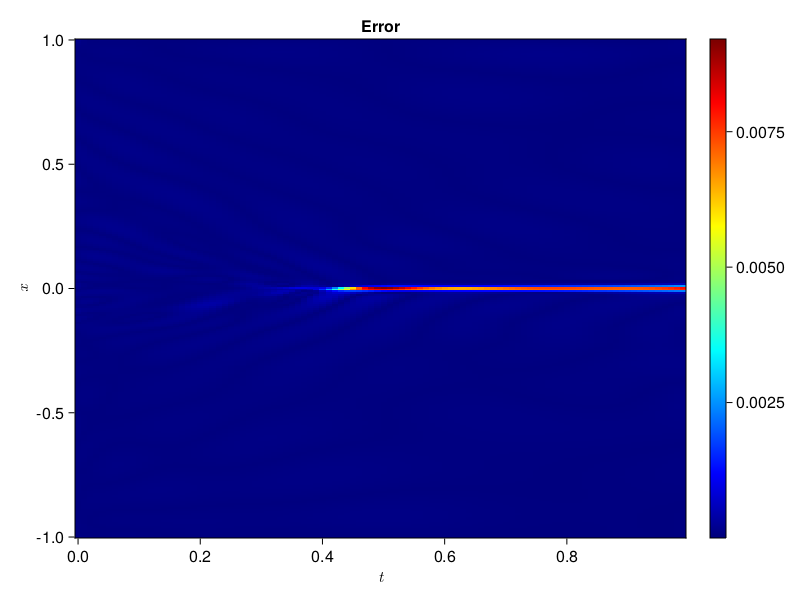

In [55]:
u_pred = [sum(pinn.phi([t, x], res.u)) for t in t_star, x in x_star]
fig, ax, hm = heatmap(t_star, x_star, abs.(usol' - u_pred);
                      axis=(xlabel=L"t", ylabel=L"x", title="Error"), colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig

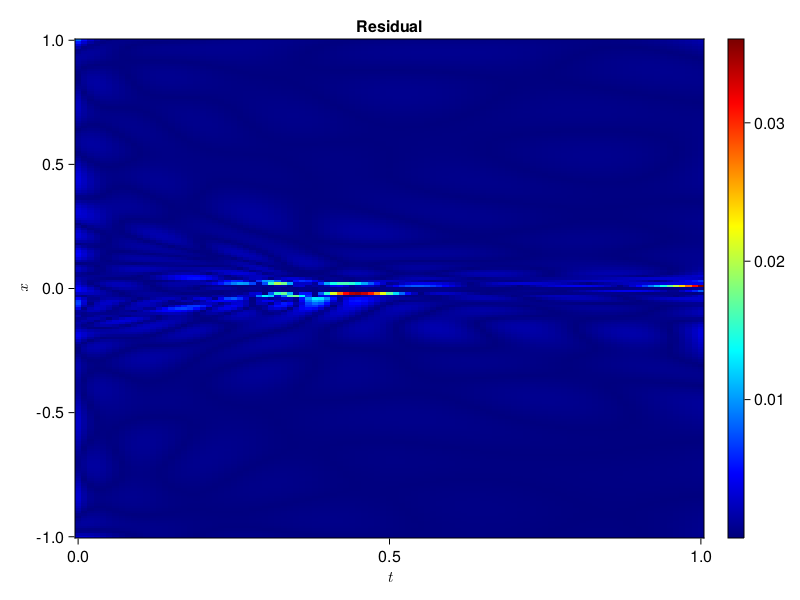

In [59]:
residual = [sum(abs, Sophon.residual_function_1([t, x], res.u)) for t in ts, x in xs]

fig, ax, hm = heatmap(ts, xs, residual, axis=merge(axis, (title = "Residual",)), colormap=:jet)
Colorbar(fig[:, end + 1], hm)
fig